In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Crea un objeto de conexión a la base de datos SQLite
con = sqlite3.connect("Escalas.db")

# Con la conexión, crea un objeto cursor
cur = con.cursor()

#### Extracción de los datos QR y tarjetas

In [2]:
df_salidas_QR = pd.read_sql_query('SELECT COUNT(*) cantidadQR, Fecha  FROM accesoQR WHERE Puerta == " Raos Salida 1 " AND "2021-04-13" <= Fecha AND  Fecha <= "2021-12-31" GROUP BY Fecha;',con)
print(df_salidas_QR.head())
print(df_salidas_QR.shape)

   cantidadQR       Fecha
0        1364  2021-04-13
1        1289  2021-04-14
2         892  2021-04-15
3        1251  2021-04-16
4         229  2021-04-17
(258, 2)


In [3]:
df_salidas_tarjetas = pd.read_sql_query('SELECT COUNT(*) cantidadTarjeta, Fecha FROM accesoTarjeta GROUP BY Fecha;',con)
print(df_salidas_tarjetas.head())
print(df_salidas_tarjetas.shape)

   cantidadTarjeta       Fecha
0              176  2021-04-13
1              607  2021-04-14
2              249  2021-04-15
3              299  2021-04-16
4               72  2021-04-17
(239, 2)


In [4]:
merge_df = pd.merge(df_salidas_QR, df_salidas_tarjetas, how = "outer", on = ["Fecha"])
merge_df = merge_df.fillna(0)
print(merge_df.head())
merge_df['Suma accesos'] = merge_df['cantidadTarjeta'] +merge_df['cantidadQR']
print(merge_df.shape)

   cantidadQR       Fecha  cantidadTarjeta
0      1364.0  2021-04-13            176.0
1      1289.0  2021-04-14            607.0
2       892.0  2021-04-15            249.0
3      1251.0  2021-04-16            299.0
4       229.0  2021-04-17             72.0
(263, 4)


In [5]:
import numpy as np
coef1 = np.corrcoef(merge_df['Suma accesos'].tolist(),merge_df['cantidadTarjeta'].tolist())
print(coef1)

coef2 = np.corrcoef(merge_df['Suma accesos'].tolist(),merge_df['cantidadQR'].tolist())
print(coef2)

coef3 = np.corrcoef(merge_df['cantidadTarjeta'].tolist(),merge_df['cantidadQR'].tolist())
print(coef3)

[[1.         0.77630081]
 [0.77630081 1.        ]]
[[1.         0.90919205]
 [0.90919205 1.        ]]
[[1.         0.44333802]
 [0.44333802 1.        ]]


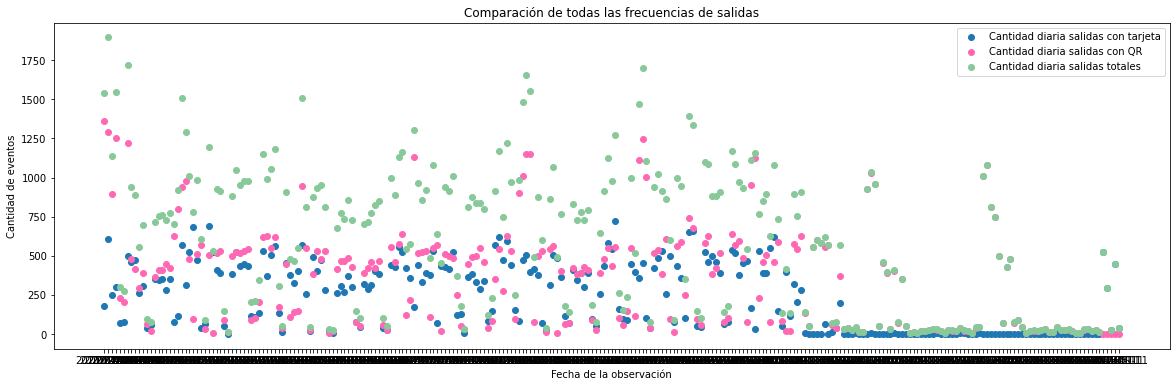

In [6]:
plt.figure(figsize=(20,6))
plt.scatter(merge_df["Fecha"],merge_df["cantidadTarjeta"],label="Cantidad diaria salidas con tarjeta")
plt.scatter(merge_df["Fecha"],merge_df["cantidadQR"],color = 'hotpink',label="Cantidad diaria salidas con QR")
plt.scatter(merge_df["Fecha"],merge_df["Suma accesos"],color = '#88c999',label="Cantidad diaria salidas totales")
plt.xlabel("Fecha de la observación")
plt.ylabel("Cantidad de eventos")
plt.title("Comparación de todas las frecuencias de salidas")
plt.legend()

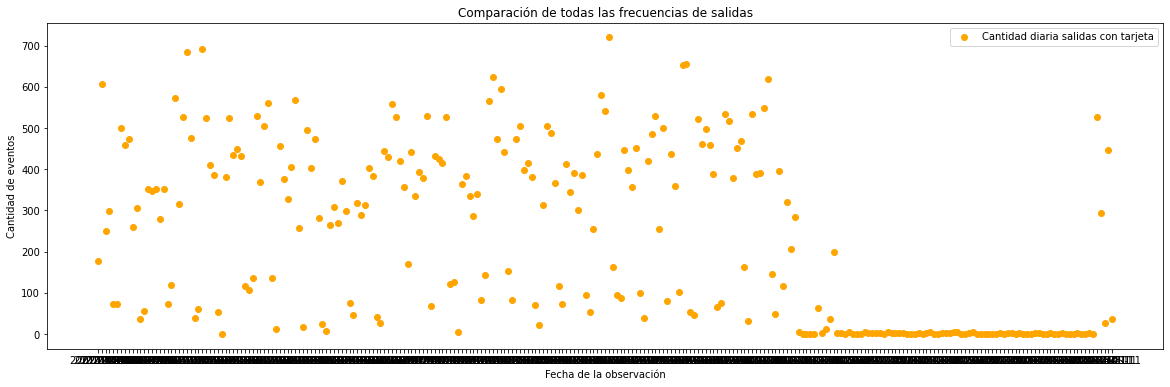

In [7]:
plt.figure(figsize=(20,6))
plt.scatter(merge_df["Fecha"],merge_df["cantidadTarjeta"],label="Cantidad diaria salidas con tarjeta", c = 'orange')
plt.xlabel("Fecha de la observación")
plt.ylabel("Cantidad de eventos")
plt.title("Comparación de todas las frecuencias de salidas")
plt.legend()

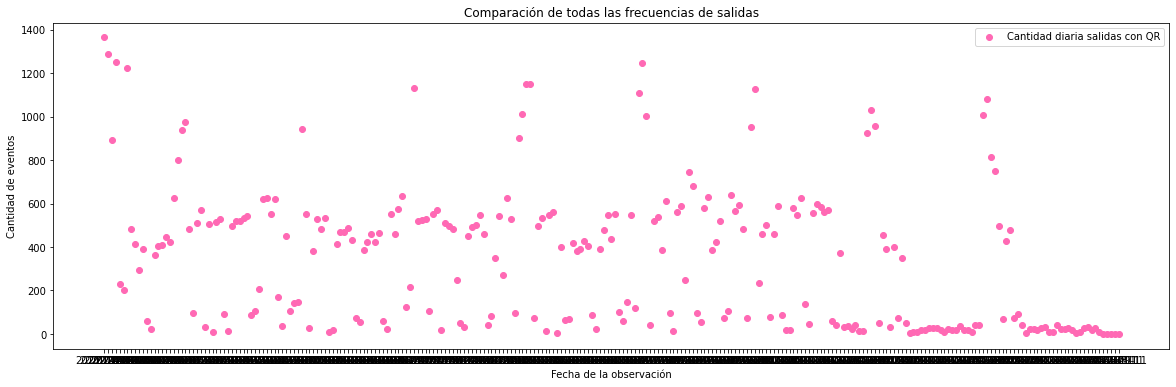

In [8]:
plt.figure(figsize=(20,6))
plt.scatter(merge_df["Fecha"],merge_df["cantidadQR"],color = 'hotpink',label="Cantidad diaria salidas con QR")
plt.xlabel("Fecha de la observación")
plt.ylabel("Cantidad de eventos")
plt.title("Comparación de todas las frecuencias de salidas")
plt.legend()

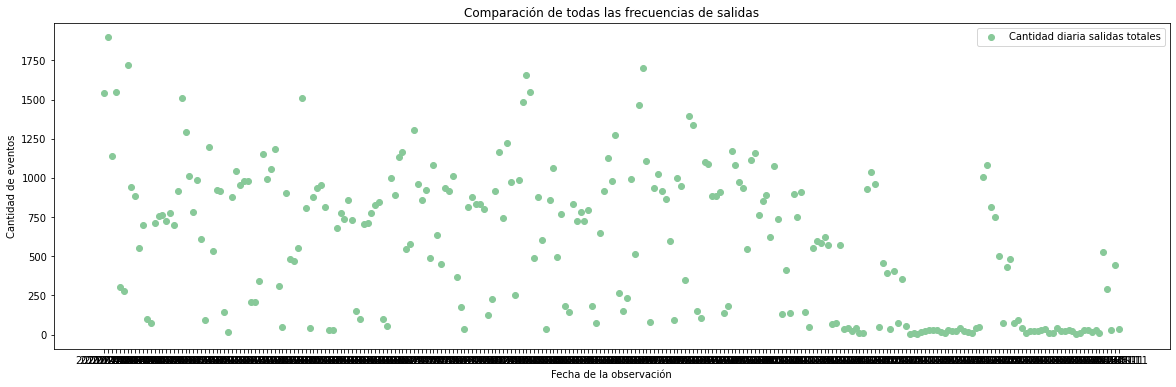

In [9]:
plt.figure(figsize=(20,6))
plt.scatter(merge_df["Fecha"],merge_df["Suma accesos"],color = '#88c999',label="Cantidad diaria salidas totales")
plt.xlabel("Fecha de la observación")
plt.ylabel("Cantidad de eventos")
plt.title("Comparación de todas las frecuencias de salidas")
plt.legend()

#### Gráfico de distribución de las variables

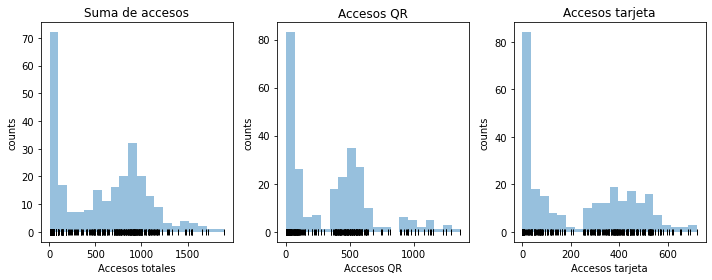

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

axs[0].hist(x=merge_df["Suma accesos"], bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(merge_df["Suma accesos"], np.full_like(merge_df["Suma accesos"], -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Suma de accesos')
axs[0].set_xlabel('Accesos totales')
axs[0].set_ylabel('counts')

axs[1].hist(x=merge_df["cantidadQR"], bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(merge_df["cantidadQR"], np.full_like(merge_df["cantidadQR"], -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Accesos QR')
axs[1].set_xlabel('Accesos QR')
axs[1].set_ylabel('counts')

axs[2].hist(x=merge_df["cantidadTarjeta"], bins=20, color="#3182bd", alpha=0.5)
axs[2].plot(merge_df["cantidadTarjeta"], np.full_like(merge_df["cantidadTarjeta"], -0.01), '|k', markeredgewidth=1)
axs[2].set_title('Accesos tarjeta')
axs[2].set_xlabel('Accesos tarjeta')
axs[2].set_ylabel('counts')


plt.tight_layout();

In [11]:
df_salidas = merge_df
df_salidas.head()

,cantidadQR,Fecha,cantidadTarjeta,Suma accesos
0,1364.0,2021-04-13,176.0,1540.0
1,1289.0,2021-04-14,607.0,1896.0
2,892.0,2021-04-15,249.0,1141.0
3,1251.0,2021-04-16,299.0,1550.0
4,229.0,2021-04-17,72.0,301.0


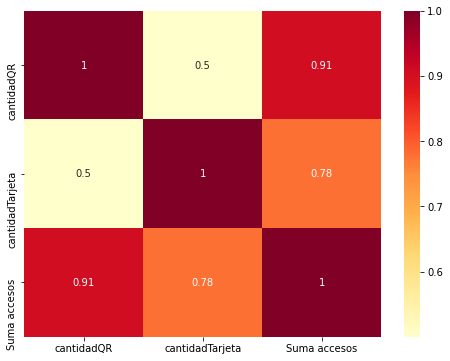

In [12]:
subset1=df_salidas[["cantidadQR","cantidadTarjeta","Suma accesos"]]
subset1
corr = subset1.corr (method = "spearman")
corr.style.background_gradient (cmap='YlOrRd').set_precision(3)

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap = "YlOrRd")
plt.show()

### Repetimos el estudio de correlaciones con cada una de las variables y cada uno de los tres registros de salidas de camiones del Puerto de Santander

#### Para ello primero creamos la lista de días de registro para poder realizar las consultas:

In [13]:
from datetime import timedelta 
import datetime

salto = timedelta(1) 
dia_inicio = datetime.datetime(2021, 4, 13) 
lista_dias_datetime = [dia_inicio]
lista_dias_str = [dia_inicio.strftime('%Y-%m-%d')]
for i in range(262):
    elem = dia_inicio + salto*(i+1)
    lista_dias_datetime.append(elem)
    lista_dias_str.append(elem.strftime('%Y-%m-%d'))
len(lista_dias_str)

263

#### Variable independiente 1: cantidad de buques en el puerto

In [14]:
cantidad_buques = []
for elem in lista_dias_datetime:
    df = pd.read_sql_query('SELECT COUNT(DISTINCT(NUMESCALA)) FROM escalas  WHERE TIPOTRANSPORTE == "CA" AND FECINIREAL <= ' + '"'+elem.strftime('%Y-%m-%d')+'"' + ' AND FECFINREAL >= ' + '"'+elem.strftime('%Y-%m-%d') +'"'+ ';',con)
    cantidad_buques.append(int(df["COUNT(DISTINCT(NUMESCALA))"]))

diccionario_previo = {"fecha":lista_dias_str,"cantidad":cantidad_buques}
df_cantidad_buques = pd.DataFrame(diccionario_previo)

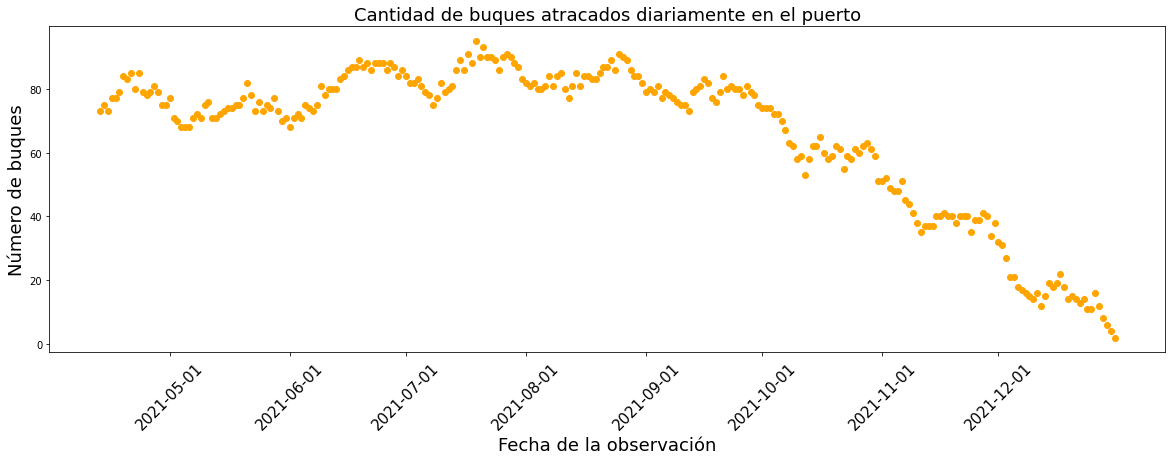

In [19]:
etiquetas_x = []
for i in range(5,13):
    elem =  datetime.datetime(2021, i, 1)
    etiquetas_x.append(elem.strftime('%Y-%m-%d'))

fig, ax = plt.subplots()

ax.scatter(df_cantidad_buques["fecha"],df_cantidad_buques["cantidad"], c = 'orange')
ax.set_ylabel("Número de buques",fontsize=18)
ax.set_xlabel("Fecha de la observación",fontsize=18)
ax.set_title("Cantidad de buques atracados diariamente en el puerto", fontsize=18)
ax.set_xticks([18,49,79,110,141,171,202,232])
ax.set_xticklabels(etiquetas_x, rotation = 45,fontsize=15)

fig.set_size_inches(20, 6)
plt.show()

Text(0, 0.5, 'Frecuencia')

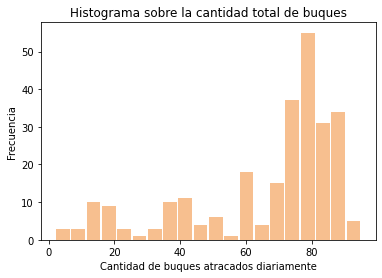

In [16]:
plt.hist(x=df_cantidad_buques["cantidad"], bins=20, rwidth = 0.9,color = "sandybrown",alpha=0.7)
plt.title('Histograma sobre la cantidad total de buques')
plt.xlabel('Cantidad de buques atracados diariamente')
plt.ylabel('Frecuencia')

In [17]:
medianabuques = np.median(df_cantidad_buques["cantidad"])
print("Mediana de salidas de vehículos del puerto: ", medianabuques)

mediabuques = np.mean(df_cantidad_buques["cantidad"])
print("Media de salidas de vehículos del puerto: ", mediabuques)

varianzabuques = np.var(df_cantidad_buques["cantidad"])
print("Varianza de salidas de vehículos del puerto: ", varianzabuques)

import math
desviacionbuques = math.sqrt(np.var(df_cantidad_buques["cantidad"]))
print("Desviación de salidas de vehículos del puerto: ", desviacionbuques)

maximobuques = np.max(df_cantidad_buques["cantidad"])
print("Máximo de salidas de vehículos del puerto: ", maximobuques)

minimobuques = np.min(df_cantidad_buques["cantidad"])
print("Mínimo de salidas de vehículos del puerto: ", minimobuques)

Mediana de salidas de vehículos del puerto:  75.0
Media de salidas de vehículos del puerto:  66.18250950570342
Varianza de salidas de vehículos del puerto:  536.5978689875523
Desviación de salidas de vehículos del puerto:  23.16458221051164
Máximo de salidas de vehículos del puerto:  95
Mínimo de salidas de vehículos del puerto:  2


#### Variable independiente 2: cantidad de buques según presentación

In [18]:
lista_gl = []
lista_gs = []
lista_mg = []
for elem in lista_dias_datetime:
    df = pd.read_sql_query('SELECT l.PRESENTACION, COUNT(DISTINCT(NUMESCALA)) FROM escalas l WHERE TIPOTRANSPORTE == "CA" AND l.FECINIREAL <= ' + '"'+elem.strftime('%Y-%m-%d')+'"' + ' AND l.FECFINREAL >=  ' + '"'+elem.strftime('%Y-%m-%d') +'"'+' GROUP BY l.PRESENTACION;',con)
    
    maskGS = df["PRESENTACION"] == "GS"
    maskMG = df["PRESENTACION"] == "MG"
    maskGL = df["PRESENTACION"] == "GL"
    
    if df["COUNT(DISTINCT(NUMESCALA))"][maskGL].empty:
        lista_gl.append(0)
    else:
        lista_gl.append(int(df["COUNT(DISTINCT(NUMESCALA))"][maskGL]))
        
    if df["COUNT(DISTINCT(NUMESCALA))"][maskGS].empty:
        lista_gs.append(0)
    else:
        lista_gs.append(int(df["COUNT(DISTINCT(NUMESCALA))"][maskGS]))
        
    if df["COUNT(DISTINCT(NUMESCALA))"][maskMG].empty:
        lista_mg.append(0)
    else:
        lista_mg.append(int(df["COUNT(DISTINCT(NUMESCALA))"][maskMG]))

#### Presentación GL

Text(0.5, 1.0, 'Número de buques de ese tipo atracados')

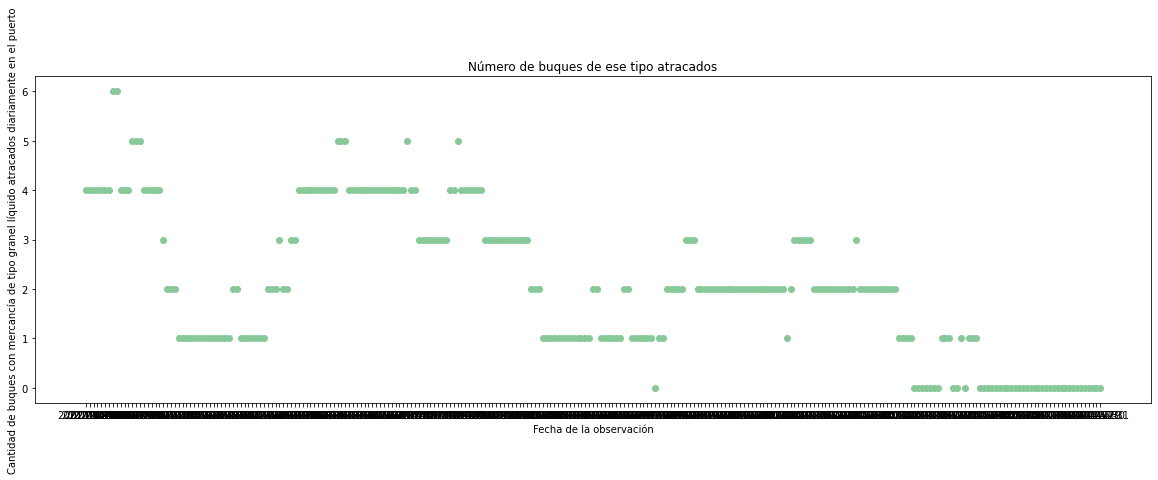

In [19]:
diccionario_cantidad_gl = {"fecha":lista_dias_str,"cantidad":lista_gl}
df_cantidad_buques_gl = pd.DataFrame(diccionario_cantidad_gl)

plt.figure(figsize=(20,6))
plt.scatter(df_cantidad_buques_gl["fecha"],df_cantidad_buques_gl["cantidad"],color = '#88c999')
plt.xlabel("Fecha de la observación")
plt.ylabel("Cantidad de buques con mercancía de tipo granel líquido atracados diariamente en el puerto")
plt.title("Número de buques de ese tipo atracados")

#### Presentación GS

Text(0.5, 1.0, 'Número de buques de ese tipo atracados')

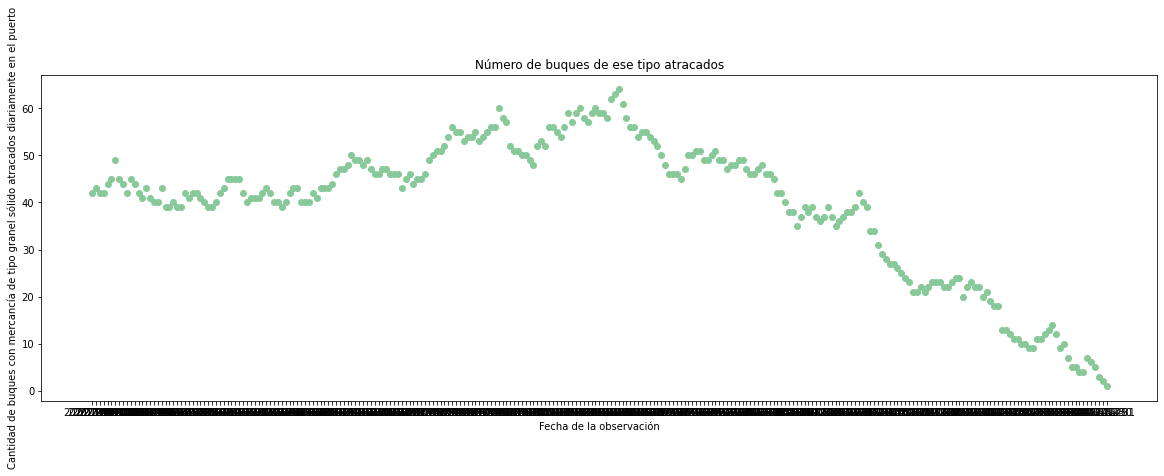

In [20]:
diccionario_cantidad_gs = {"fecha":lista_dias_str,"cantidad":lista_gs}
df_cantidad_buques_gs = pd.DataFrame(diccionario_cantidad_gs)

plt.figure(figsize=(20,6))
plt.scatter(df_cantidad_buques_gs["fecha"],df_cantidad_buques_gs["cantidad"],color = '#88c999')
plt.xlabel("Fecha de la observación")
plt.ylabel("Cantidad de buques con mercancía de tipo granel sólido atracados diariamente en el puerto")
plt.title("Número de buques de ese tipo atracados")

#### Presentación MG

Text(0.5, 1.0, 'Número de buques de ese tipo atracados')

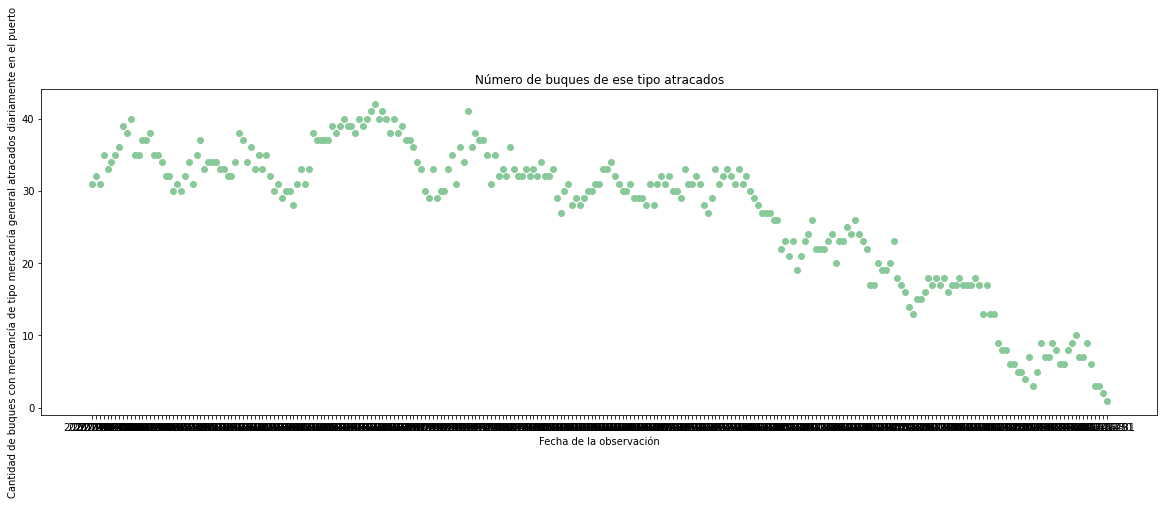

In [21]:
diccionario_cantidad_mg = {"fecha":lista_dias_str,"cantidad":lista_mg}
df_cantidad_buques_mg = pd.DataFrame(diccionario_cantidad_mg)

plt.figure(figsize=(20,6))
plt.scatter(df_cantidad_buques_mg["fecha"],df_cantidad_buques_mg["cantidad"],color = '#88c999')
plt.xlabel("Fecha de la observación")
plt.ylabel("Cantidad de buques con mercancía de tipo mercancía general atracados diariamente en el puerto")
plt.title("Número de buques de ese tipo atracados")

#### Variable independiente 3: cantidad de buques según subgrupo

In [20]:
lista_abonos = []
lista_agro_ganadero = []
lista_energetico = []
lista_construccion = []
lista_no_metalicos = []
lista_otras_merancias = []
lista_quimicos = []
lista_siderometalurgico = []
lista_vehiculos_y_transporte = []

for elem in lista_dias_datetime:
    df = pd.read_sql_query('SELECT l.SUBGRUPO, COUNT(DISTINCT(NUMESCALA)) FROM escalas l WHERE TIPOTRANSPORTE = "CA" AND l.FECINIREAL <= ' + '"'+elem.strftime('%Y-%m-%d')+'"' + ' AND l.FECFINREAL >=  ' + '"'+elem.strftime('%Y-%m-%d') +'"'+' GROUP BY l.SUBGRUPO;',con)
    
    maskAbonos = df["SUBGRUPO"] == "Abonos"
    maskAgroganadero = df["SUBGRUPO"] == "Agro-ganadero y alimentario"
    maskEnergetico = df["SUBGRUPO"] == "Energético"
    maskConstruccion = df["SUBGRUPO"] == "Material de construcción"
    maskNoMetalicos = df["SUBGRUPO"] == "Minerales no metálicos"
    maskOtros = df["SUBGRUPO"] == "Otras mercancías"
    maskQuimicos = df["SUBGRUPO"] == "Químicos"
    maskSiderometalurgico = df["SUBGRUPO"] == "Siderometalúrgico"
    maskVehiculos = df["SUBGRUPO"] == "Vehículos y elementos de transporte"
    
    if df["COUNT(DISTINCT(NUMESCALA))"][maskAbonos].empty:
        lista_abonos.append(0)
    else:
        lista_abonos.append(int(df["COUNT(DISTINCT(NUMESCALA))"][maskAbonos]))
        
    if df["COUNT(DISTINCT(NUMESCALA))"][maskAgroganadero].empty:
        lista_agro_ganadero.append(0)
    else:
        lista_agro_ganadero.append(int(df["COUNT(DISTINCT(NUMESCALA))"][maskAgroganadero]))
        
    if df["COUNT(DISTINCT(NUMESCALA))"][maskEnergetico].empty:
        lista_energetico.append(0)
    else:
        lista_energetico.append(int(df["COUNT(DISTINCT(NUMESCALA))"][maskEnergetico]))

    if df["COUNT(DISTINCT(NUMESCALA))"][maskConstruccion].empty:
        lista_construccion.append(0)
    else:
        lista_construccion.append(int(df["COUNT(DISTINCT(NUMESCALA))"][maskConstruccion]))
        
    if df["COUNT(DISTINCT(NUMESCALA))"][maskNoMetalicos].empty:
        lista_no_metalicos.append(0)
    else:
        lista_no_metalicos.append(int(df["COUNT(DISTINCT(NUMESCALA))"][maskNoMetalicos]))
        
    if df["COUNT(DISTINCT(NUMESCALA))"][maskOtros].empty:
        lista_otras_merancias.append(0)
    else:
        lista_otras_merancias.append(int(df["COUNT(DISTINCT(NUMESCALA))"][maskOtros]))
        
    if df["COUNT(DISTINCT(NUMESCALA))"][maskQuimicos].empty:
        lista_quimicos.append(0)
    else:
        lista_quimicos.append(int(df["COUNT(DISTINCT(NUMESCALA))"][maskQuimicos]))
        
    if df["COUNT(DISTINCT(NUMESCALA))"][maskSiderometalurgico].empty:
        lista_siderometalurgico.append(0)
    else:
        lista_siderometalurgico.append(int(df["COUNT(DISTINCT(NUMESCALA))"][maskSiderometalurgico]))
        
    if df["COUNT(DISTINCT(NUMESCALA))"][maskVehiculos].empty:
        lista_vehiculos_y_transporte.append(0)
    else:
        lista_vehiculos_y_transporte.append(int(df["COUNT(DISTINCT(NUMESCALA))"][maskVehiculos]))

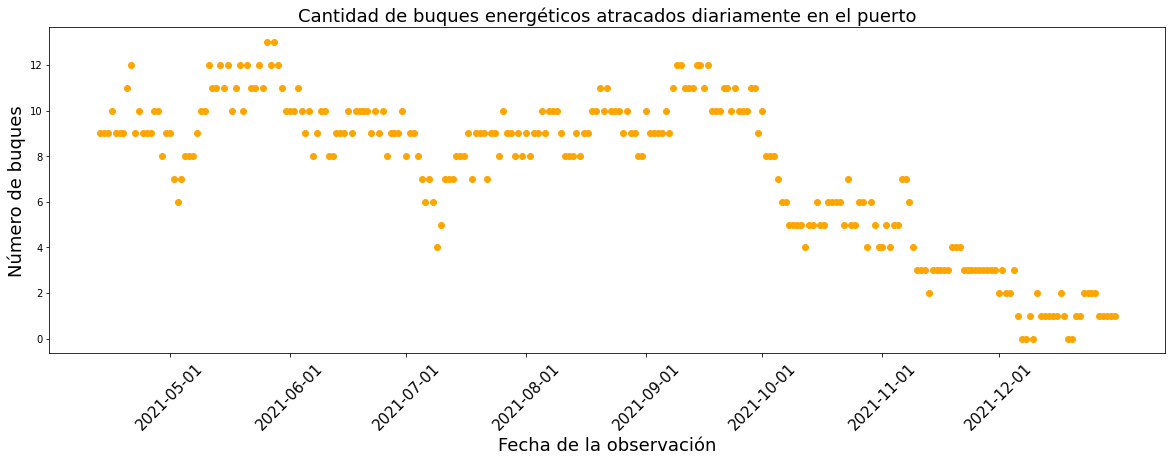

In [21]:
etiquetas_x = []
for i in range(5,13):
    elem =  datetime.datetime(2021, i, 1)
    etiquetas_x.append(elem.strftime('%Y-%m-%d'))

fig, ax = plt.subplots()

ax.scatter(lista_dias_str, lista_energetico,color = 'orange')
ax.set_ylabel("Número de buques",fontsize=18)
ax.set_xlabel("Fecha de la observación",fontsize=18)
ax.set_title("Cantidad de buques energéticos atracados diariamente en el puerto",fontsize=18)
ax.set_xticks([18,49,79,110,141,171,202,232])
ax.set_xticklabels(etiquetas_x, rotation = 45,fontsize=15)

fig.set_size_inches(20, 6)
plt.show()

Text(0, 0.5, 'Frecuencia')

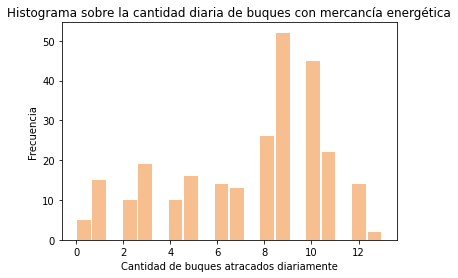

In [24]:
plt.hist(x=lista_energetico, bins=20, rwidth = 0.9,color = "sandybrown",alpha=0.7)
plt.title('Histograma sobre la cantidad diaria de buques con mercancía energética')
plt.xlabel('Cantidad de buques atracados diariamente')
plt.ylabel('Frecuencia')

In [25]:
medianabuquesEnerg = np.median(lista_energetico)
print("Mediana de salidas de vehículos del puerto: ", medianabuquesEnerg)

mediabuquesEnerg = np.mean(lista_energetico)
print("Media de salidas de vehículos del puerto: ", mediabuquesEnerg)

varianzabuquesEnerg = np.var(lista_energetico)
print("Varianza de salidas de vehículos del puerto: ", varianzabuquesEnerg)

import math
desviacionbuquesEnerg = math.sqrt(np.var(lista_energetico))
print("Desviación de salidas de vehículos del puerto: ", desviacionbuquesEnerg)

maximobuquesEnerg = np.max(lista_energetico)
print("Máximo de salidas de vehículos del puerto: ", maximobuquesEnerg)

minimobuquesEnerg = np.min(lista_energetico)
print("Mínimo de salidas de vehículos del puerto: ", minimobuquesEnerg)

Mediana de salidas de vehículos del puerto:  9.0
Media de salidas de vehículos del puerto:  7.4106463878327
Varianza de salidas de vehículos del puerto:  10.934031141118133
Desviación de salidas de vehículos del puerto:  3.306664655074375
Máximo de salidas de vehículos del puerto:  13
Mínimo de salidas de vehículos del puerto:  0


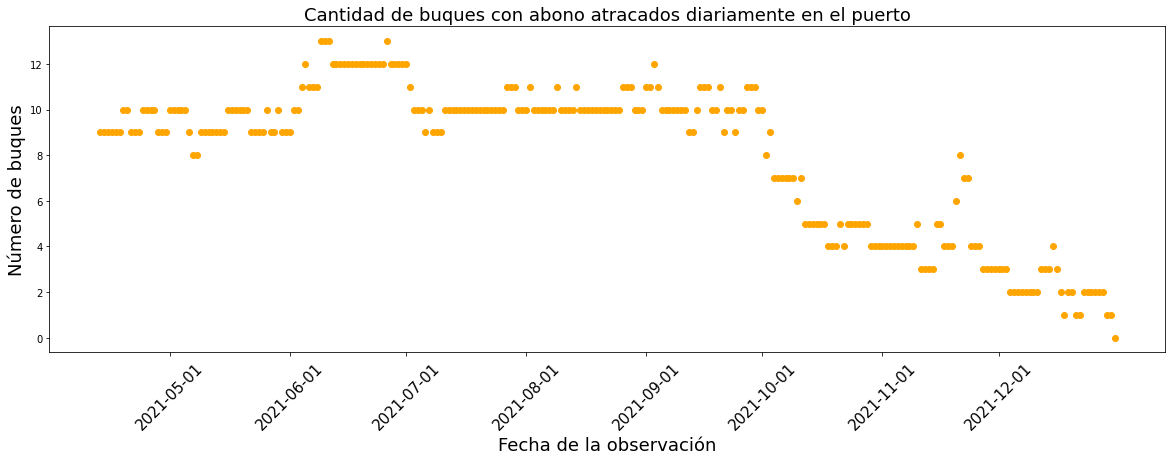

In [22]:
etiquetas_x = []
for i in range(5,13):
    elem =  datetime.datetime(2021, i, 1)
    etiquetas_x.append(elem.strftime('%Y-%m-%d'))

fig, ax = plt.subplots()

ax.scatter(lista_dias_str, lista_abonos,color = 'orange')
ax.set_ylabel("Número de buques",fontsize=18)
ax.set_xlabel("Fecha de la observación",fontsize=18)
ax.set_title("Cantidad de buques con abono atracados diariamente en el puerto",fontsize=18)
ax.set_xticks([18,49,79,110,141,171,202,232])
ax.set_xticklabels(etiquetas_x, rotation = 45,fontsize=15)

fig.set_size_inches(20, 6)
plt.show()

Text(0, 0.5, 'Frecuencia')

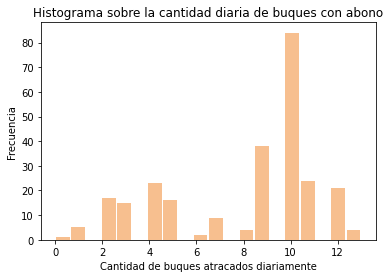

In [27]:
plt.hist(x=lista_abonos, bins=20, rwidth = 0.9,color = "sandybrown",alpha=0.7)
plt.title('Histograma sobre la cantidad diaria de buques con abono')
plt.xlabel('Cantidad de buques atracados diariamente')
plt.ylabel('Frecuencia')

In [28]:
medianabuquesAbono = np.median(lista_abonos)
print("Mediana de salidas de vehículos del puerto: ", medianabuquesAbono)

mediabuquesAbono = np.mean(lista_abonos)
print("Media de salidas de vehículos del puerto: ", mediabuquesAbono)

varianzabuquesAbono = np.var(lista_abonos)
print("Varianza de salidas de vehículos del puerto: ", varianzabuquesAbono)

import math
desviacionbuquesAbono = math.sqrt(np.var(lista_abonos))
print("Desviación de salidas de vehículos del puerto: ", desviacionbuquesAbono)

maximobuquesAbono = np.max(lista_abonos)
print("Máximo de salidas de vehículos del puerto: ", maximobuquesAbono)

minimobuquesAbono = np.min(lista_abonos)
print("Mínimo de salidas de vehículos del puerto: ", minimobuquesAbono)

Mediana de salidas de vehículos del puerto:  10.0
Media de salidas de vehículos del puerto:  8.034220532319392
Varianza de salidas de vehículos del puerto:  10.839133137677285
Desviación de salidas de vehículos del puerto:  3.2922838786588993
Máximo de salidas de vehículos del puerto:  13
Mínimo de salidas de vehículos del puerto:  0


Text(0.5, 1.0, 'Cantidad de buques con mercancía agroganadera atracados diariamente en el puerto')

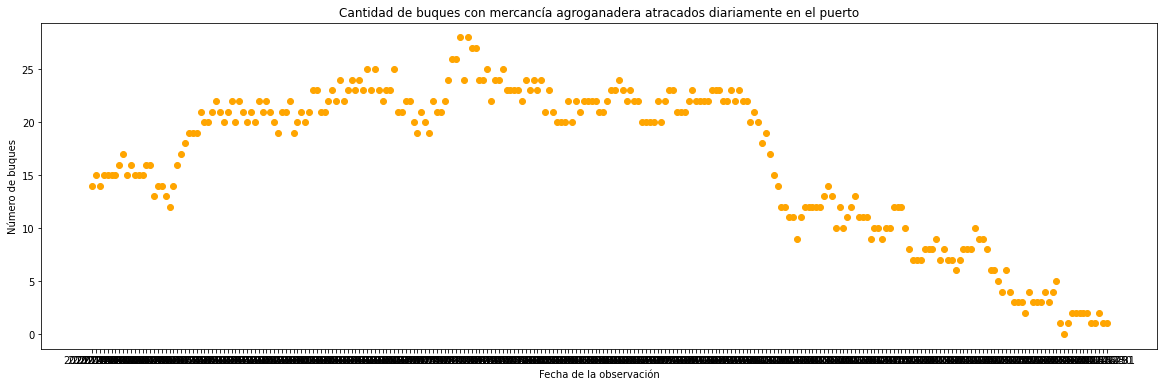

In [29]:

plt.figure(figsize=(20,6))
plt.scatter(lista_dias_str, lista_agro_ganadero,color = 'orange')
plt.xlabel("Fecha de la observación",fontsize=18)
plt.ylabel("Número de buques")
plt.title("Cantidad de buques con mercancía agroganadera atracados diariamente en el puerto")


Text(0, 0.5, 'Frecuencia')

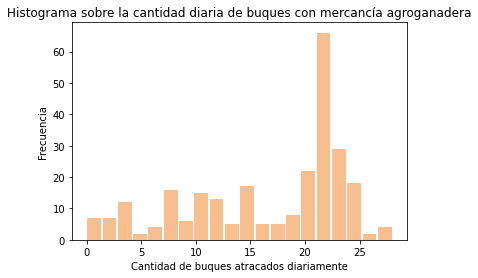

In [30]:
plt.hist(x=lista_agro_ganadero, bins=20, rwidth = 0.9,color = "sandybrown",alpha=0.7)
plt.title('Histograma sobre la cantidad diaria de buques con mercancía agroganadera')
plt.xlabel('Cantidad de buques atracados diariamente')
plt.ylabel('Frecuencia')

In [31]:
medianabuquesAroGanadero = np.median(lista_agro_ganadero)
print("Mediana de salidas de vehículos del puerto: ", medianabuquesAbono)

mediabuquesAroGanadero = np.mean(lista_agro_ganadero)
print("Media de salidas de vehículos del puerto: ", mediabuquesAroGanadero)

varianzabuquesAroGanadero = np.var(lista_agro_ganadero)
print("Varianza de salidas de vehículos del puerto: ", varianzabuquesAroGanadero)

import math
desviacionbuquesAroGanadero = math.sqrt(np.var(lista_agro_ganadero))
print("Desviación de salidas de vehículos del puerto: ", desviacionbuquesAroGanadero)

maximobuquesAroGanadero = np.max(lista_agro_ganadero)
print("Máximo de salidas de vehículos del puerto: ", maximobuquesAroGanadero)

minimobuquesAroGanadero = np.min(lista_agro_ganadero)
print("Mínimo de salidas de vehículos del puerto: ", minimobuquesAroGanadero)

Mediana de salidas de vehículos del puerto:  10.0
Media de salidas de vehículos del puerto:  16.520912547528518
Varianza de salidas de vehículos del puerto:  51.45868814064103
Desviación de salidas de vehículos del puerto:  7.173471136112631
Máximo de salidas de vehículos del puerto:  28
Mínimo de salidas de vehículos del puerto:  0


Text(0.5, 1.0, 'Cantidad de buques con mercancía de siderometalurgia atracados diariamente en el puerto')

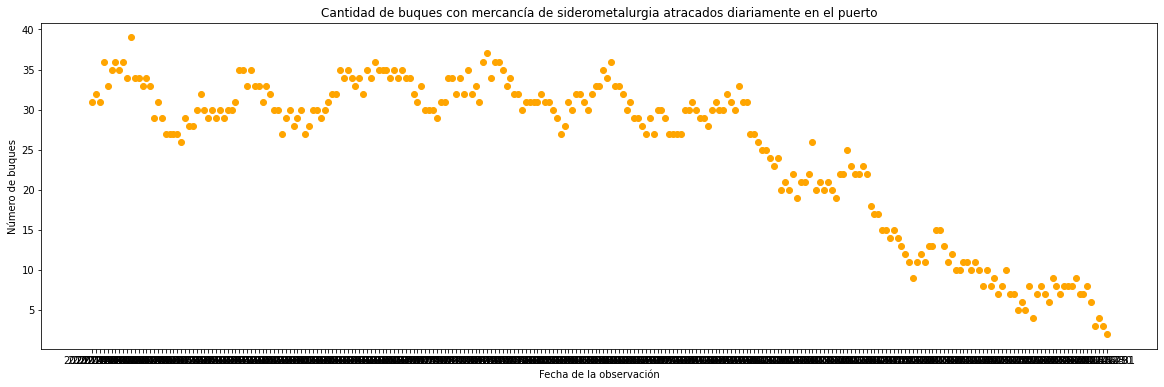

In [32]:
plt.figure(figsize=(20,6))
plt.scatter(lista_dias_str, lista_siderometalurgico,color = 'orange')
plt.xlabel("Fecha de la observación")
plt.ylabel("Número de buques")
plt.title("Cantidad de buques con mercancía de siderometalurgia atracados diariamente en el puerto")

Text(0, 0.5, 'Frecuencia')

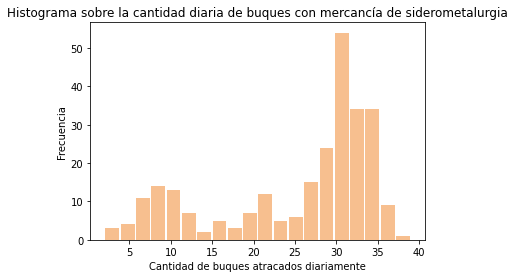

In [33]:
plt.hist(x=lista_siderometalurgico, bins=20, rwidth = 0.9,color = "sandybrown",alpha=0.7)
plt.title('Histograma sobre la cantidad diaria de buques con mercancía de siderometalurgia')
plt.xlabel('Cantidad de buques atracados diariamente')
plt.ylabel('Frecuencia')

In [34]:
medianabuquesSidero = np.median(lista_siderometalurgico)
print("Mediana de salidas de vehículos del puerto: ", medianabuquesSidero)

mediabuquesSidero = np.mean(lista_siderometalurgico)
print("Media de salidas de vehículos del puerto: ", mediabuquesSidero)

varianzabuquesSidero = np.var(lista_siderometalurgico)
print("Varianza de salidas de vehículos del puerto: ", varianzabuquesSidero)

import math
desviacionbuquesSidero = math.sqrt(np.var(lista_siderometalurgico))
print("Desviación de salidas de vehículos del puerto: ", desviacionbuquesSidero)

maximobuquesSidero = np.max(lista_siderometalurgico)
print("Máximo de salidas de vehículos del puerto: ", maximobuquesSidero)

minimobuquesSidero = np.min(lista_siderometalurgico)
print("Mínimo de salidas de vehículos del puerto: ", minimobuquesSidero)

Mediana de salidas de vehículos del puerto:  30.0
Media de salidas de vehículos del puerto:  25.250950570342205
Varianza de salidas de vehículos del puerto:  91.68607324090273
Desviación de salidas de vehículos del puerto:  9.575284499214774
Máximo de salidas de vehículos del puerto:  39
Mínimo de salidas de vehículos del puerto:  2


Text(0.5, 1.0, 'Cantidad de buques con mercancía química atracados diariamente en el puerto')

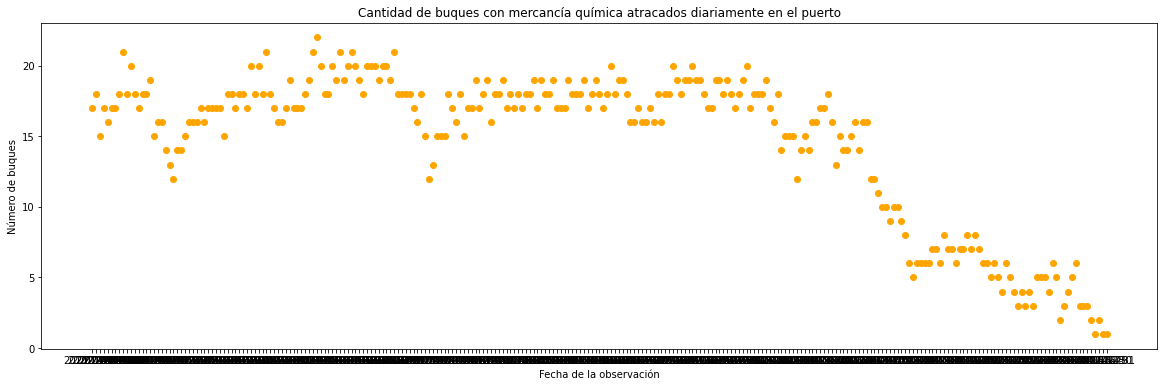

In [35]:
plt.figure(figsize=(20,6))
plt.scatter(lista_dias_str, lista_quimicos,color = 'orange')
plt.xlabel("Fecha de la observación")
plt.ylabel("Número de buques")
plt.title("Cantidad de buques con mercancía química atracados diariamente en el puerto")

Text(0, 0.5, 'Frecuencia')

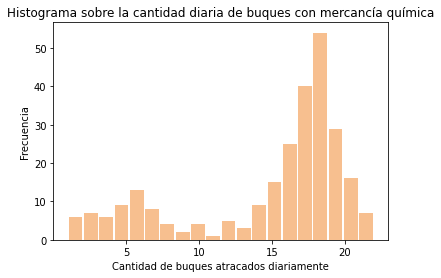

In [36]:
plt.hist(x=lista_quimicos, bins=20, rwidth = 0.9,color = "sandybrown",alpha=0.7)
plt.title('Histograma sobre la cantidad diaria de buques con mercancía química')
plt.xlabel('Cantidad de buques atracados diariamente')
plt.ylabel('Frecuencia')

In [37]:
medianabuquesQuimicos = np.median(lista_quimicos)
print("Mediana de salidas de vehículos del puerto: ", medianabuquesQuimicos)

mediabuquesQuimicos = np.mean(lista_quimicos)
print("Media de salidas de vehículos del puerto: ", mediabuquesQuimicos)

varianzabuquesQuimicos = np.var(lista_quimicos)
print("Varianza de salidas de vehículos del puerto: ", varianzabuquesQuimicos)

import math
desviacionbuquesQuimicos = math.sqrt(np.var(lista_quimicos))
print("Desviación de salidas de vehículos del puerto: ", desviacionbuquesQuimicos)

maximobuquesQuimicos = np.max(lista_quimicos)
print("Máximo de salidas de vehículos del puerto: ", maximobuquesQuimicos)

minimobuquesQuimicos = np.min(lista_quimicos)
print("Mínimo de salidas de vehículos del puerto: ", minimobuquesQuimicos)

Mediana de salidas de vehículos del puerto:  17.0
Media de salidas de vehículos del puerto:  14.657794676806084
Varianza de salidas de vehículos del puerto:  28.567306163165576
Desviación de salidas de vehículos del puerto:  5.3448392083546885
Máximo de salidas de vehículos del puerto:  22
Mínimo de salidas de vehículos del puerto:  1


Text(0.5, 1.0, 'Axis [1, 1]')

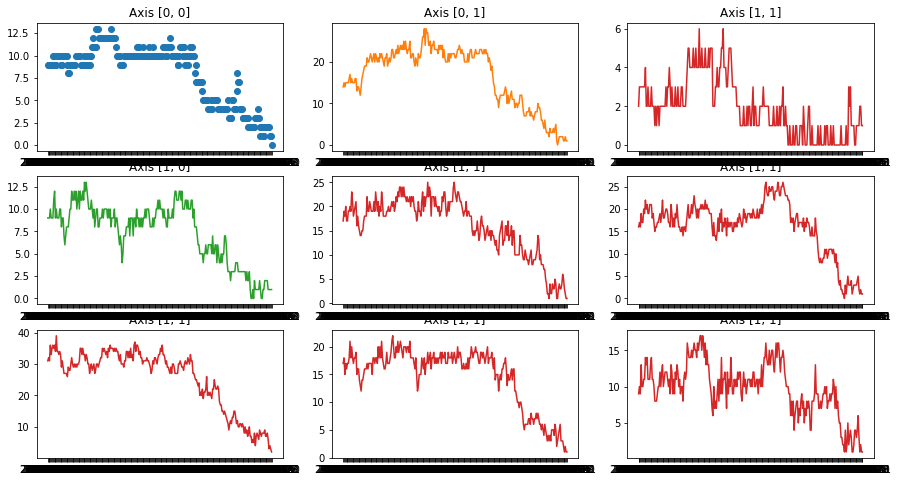

In [38]:
fig, axs = plt.subplots(3, 3,figsize=(15, 8))
axs[0, 0].scatter(lista_dias_str, lista_abonos)
axs[0, 0].set_title('Axis [0, 0]')

axs[0, 1].plot(lista_dias_str, lista_agro_ganadero, 'tab:orange')
axs[0, 1].set_title('Axis [0, 1]')

axs[1, 0].plot(lista_dias_str, lista_energetico, 'tab:green')
axs[1, 0].set_title('Axis [1, 0]')

axs[1, 1].plot(lista_dias_str, lista_construccion, 'tab:red')
axs[1, 1].set_title('Axis [1, 1]')

axs[0, 2].plot(lista_dias_str, lista_no_metalicos, 'tab:red')
axs[0, 2].set_title('Axis [1, 1]')

axs[1, 2].plot(lista_dias_str, lista_otras_merancias, 'tab:red')
axs[1, 2].set_title('Axis [1, 1]')

axs[2, 1].plot(lista_dias_str, lista_quimicos, 'tab:red')
axs[2, 1].set_title('Axis [1, 1]')

axs[2, 0].plot(lista_dias_str, lista_siderometalurgico, 'tab:red')
axs[2, 0].set_title('Axis [1, 1]')

axs[2, 2].plot(lista_dias_str, lista_vehiculos_y_transporte, 'tab:red')
axs[2, 2].set_title('Axis [1, 1]')

#### Variable independiente 4: toneladas en movimiento en el puerto diarias

In [39]:
cantidad_toneladas = []
for elem in lista_dias_datetime:
    df = pd.read_sql_query('SELECT SUM(l.TONELADAS) cantidadToneladas, l.PRESENTACION Presentacion FROM escalas l WHERE TIPOTRANSPORTE == "CA" AND l.FECINIREAL <= ' + '"'+elem.strftime('%Y-%m-%d')+'"' + ' AND FECFINREAL >= ' + '"'+elem.strftime('%Y-%m-%d') +'"',con)
    cantidad_toneladas.append(int(df["cantidadToneladas"]))

diccionario_previo = {"fecha":lista_dias_str,"cantidad":cantidad_toneladas}
df_cantidad_toneladas = pd.DataFrame(diccionario_previo)

Text(0.5, 1.0, 'Cantidad de toneladas en movimiento')

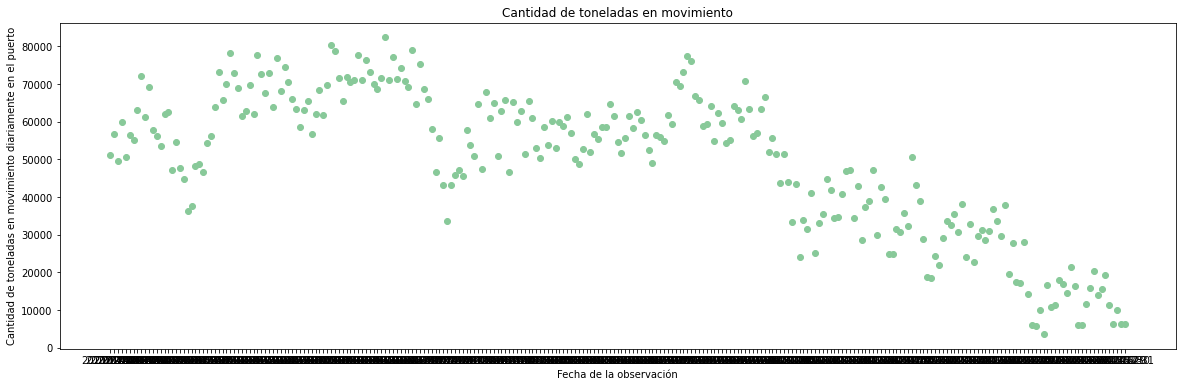

In [40]:
plt.figure(figsize=(20,6))
plt.scatter(df_cantidad_toneladas["fecha"],df_cantidad_toneladas["cantidad"],color = '#88c999')
plt.xlabel("Fecha de la observación")
plt.ylabel("Cantidad de toneladas en movimiento diariamente en el puerto")
plt.title("Cantidad de toneladas en movimiento")

#### Variable independiente 5: toneladas en movimiento en el puerto diarias según presentación

In [41]:
cantidad_toneladas_GL = []
cantidad_toneladas_GS = []
cantidad_toneladas_MG = []
for elem in lista_dias_datetime:
    df = pd.read_sql_query('SELECT SUM(l.TONELADAS) cantidadToneladas, l.PRESENTACION Presentacion FROM escalas l WHERE TIPOTRANSPORTE == "CA" AND l.FECINIREAL <= ' + '"'+elem.strftime('%Y-%m-%d')+'"' + ' AND FECFINREAL >= ' + '"'+elem.strftime('%Y-%m-%d') +'"  GROUP BY l.PRESENTACION ',con)
    maskGL = df["Presentacion"] == "GL"
    maskGS = df["Presentacion"] == "GS"
    maskMG = df["Presentacion"] == "MG"
    if len(df[maskGL]["cantidadToneladas"]) == 0:
        cantidad_toneladas_GL.append(0)
    else:
        cantidad_toneladas_GL.append(int(df[maskGL]["cantidadToneladas"]))
        
    if len(df[maskGS]["cantidadToneladas"]) == 0:
        cantidad_toneladas_GS.append(0)
    else:
        cantidad_toneladas_GS.append(int(df[maskGS]["cantidadToneladas"]))
        
    if len(df[maskMG]["cantidadToneladas"]) == 0:
        cantidad_toneladas_MG.append(0)
    else:
        cantidad_toneladas_MG.append(int(df[maskMG]["cantidadToneladas"]))

Text(0.5, 1.0, 'Cantidad de toneladas en movimiento diariamente en el puerto de GL')

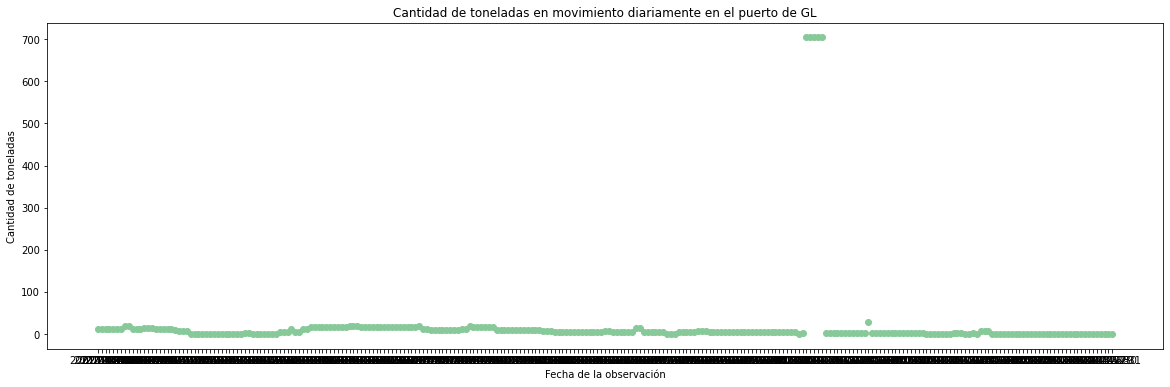

In [42]:
plt.figure(figsize=(20,6))
plt.scatter(lista_dias_str,cantidad_toneladas_GL,color = '#88c999')
plt.xlabel("Fecha de la observación")
plt.ylabel("Cantidad de toneladas")
plt.title("Cantidad de toneladas en movimiento diariamente en el puerto de GL")

Text(0.5, 1.0, 'Cantidad de toneladas en movimiento diariamente en el puerto de GS')

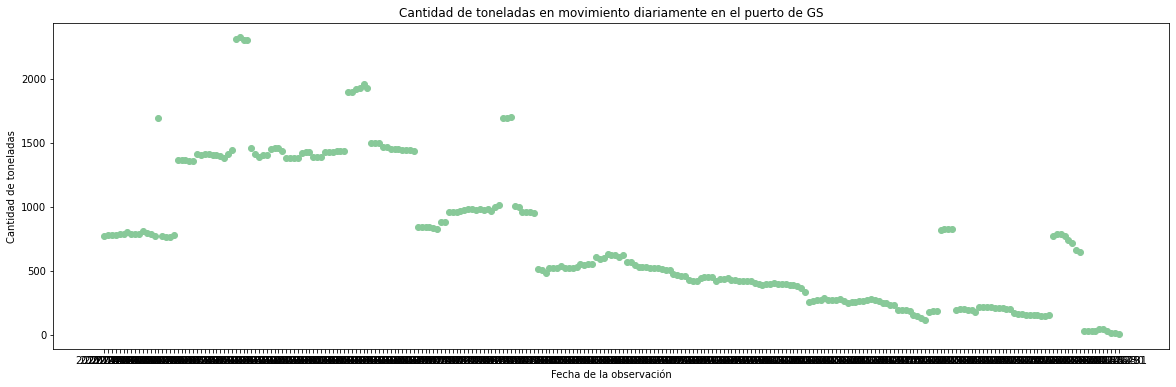

In [43]:
plt.figure(figsize=(20,6))
plt.scatter(lista_dias_str,cantidad_toneladas_GS,color = '#88c999')
plt.xlabel("Fecha de la observación")
plt.ylabel("Cantidad de toneladas")
plt.title("Cantidad de toneladas en movimiento diariamente en el puerto de GS")

In [44]:
medianaToneladasMG = np.median(cantidad_toneladas_MG)
print("Mediana de salidas de vehículos del puerto: ", medianaToneladasMG)

mediabuquesToneladasMG = np.mean(cantidad_toneladas_MG)
print("Media de salidas de vehículos del puerto: ", mediabuquesToneladasMG)

varianzaToneladasMG = np.var(cantidad_toneladas_MG)
print("Varianza de salidas de vehículos del puerto: ", varianzaToneladasMG)

import math
desviacionToneladasMG = math.sqrt(np.var(cantidad_toneladas_MG))
print("Desviación de salidas de vehículos del puerto: ", desviacionToneladasMG)

maximoToneladasMG = np.max(cantidad_toneladas_MG)
print("Máximo de salidas de vehículos del puerto: ", maximoToneladasMG)

minimoToneladasMG = np.min(cantidad_toneladas_MG)
print("Mínimo de salidas de vehículos del puerto: ", minimoToneladasMG)

Mediana de salidas de vehículos del puerto:  53995.0
Media de salidas de vehículos del puerto:  48822.57794676806
Varianza de salidas de vehículos del puerto:  355055901.3465859
Desviación de salidas de vehículos del puerto:  18842.927090730514
Máximo de salidas de vehículos del puerto:  80829
Mínimo de salidas de vehículos del puerto:  3474


Text(0.5, 1.0, 'Cantidad de toneladas en movimiento diariamente en el puerto de MG')

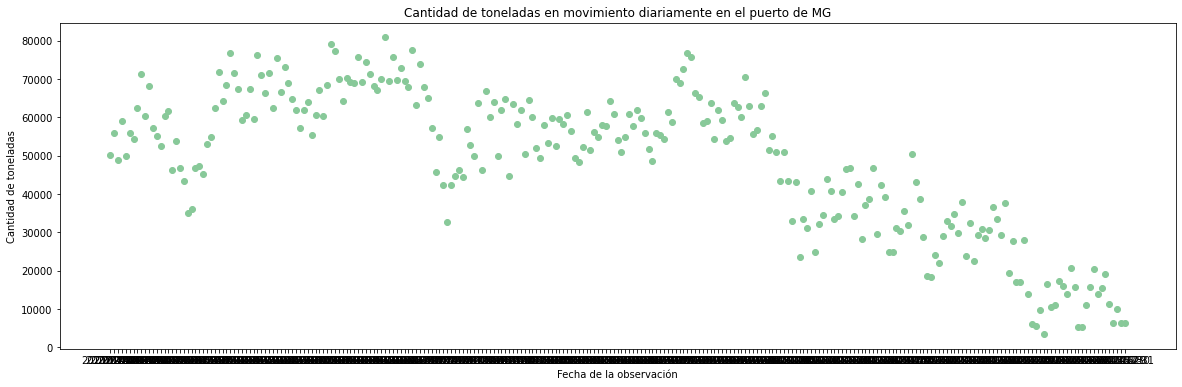

In [45]:
plt.figure(figsize=(20,6))
plt.scatter(lista_dias_str,cantidad_toneladas_MG,color = '#88c999')
plt.xlabel("Fecha de la observación")
plt.ylabel("Cantidad de toneladas")
plt.title("Cantidad de toneladas en movimiento diariamente en el puerto de MG")

#### Variable independiente 6: cantidad de toneladas por grupo

In [46]:
lista_ton_abonos = []
lista_ton_agro_ganadero = []
lista_ton_energetico = []
lista_ton_construccion = []
lista_ton_no_metalicos = []
lista_ton_otras_merancias = []
lista_ton_quimicos = []
lista_ton_siderometalurgico = []
lista_ton_vehiculos_y_transporte = []

for elem in lista_dias_datetime:
    df = pd.read_sql_query('SELECT l.SUBGRUPO, SUM(l.TONELADAS) FROM escalas l WHERE TIPOTRANSPORTE == "CA" AND l.FECINIREAL <= ' + '"'+elem.strftime('%Y-%m-%d')+'"' + ' AND l.FECFINREAL >=  ' + '"'+elem.strftime('%Y-%m-%d') +'"'+' GROUP BY l.SUBGRUPO;',con)
    
    maskAbonos = df["SUBGRUPO"] == "Abonos"
    maskAgroganadero = df["SUBGRUPO"] == "Agro-ganadero y alimentario"
    maskEnergetico = df["SUBGRUPO"] == "Energético"
    maskConstruccion = df["SUBGRUPO"] == "Material de construcción"
    maskNoMetalicos = df["SUBGRUPO"] == "Minerales no metálicos"
    maskOtros = df["SUBGRUPO"] == "Otras mercancías"
    maskQuimicos = df["SUBGRUPO"] == "Químicos"
    maskSiderometalurgico = df["SUBGRUPO"] == "Siderometalúrgico"
    maskVehiculos = df["SUBGRUPO"] == "Vehículos y elementos de transporte"
    
    if df["SUM(l.TONELADAS)"][maskAbonos].empty:
        lista_ton_abonos.append(0)
    else:
        lista_ton_abonos.append(int(df["SUM(l.TONELADAS)"][maskAbonos]))
        
    if df["SUM(l.TONELADAS)"][maskAgroganadero].empty:
        lista_ton_agro_ganadero.append(0)
    else:
        lista_ton_agro_ganadero.append(int(df["SUM(l.TONELADAS)"][maskAgroganadero]))
        
    if df["SUM(l.TONELADAS)"][maskEnergetico].empty:
        lista_ton_energetico.append(0)
    else:
        lista_ton_energetico.append(int(df["SUM(l.TONELADAS)"][maskEnergetico]))

    if df["SUM(l.TONELADAS)"][maskConstruccion].empty:
        lista_ton_construccion.append(0)
    else:
        lista_ton_construccion.append(int(df["SUM(l.TONELADAS)"][maskConstruccion]))
        
    if df["SUM(l.TONELADAS)"][maskNoMetalicos].empty:
        lista_ton_no_metalicos.append(0)
    else:
        lista_ton_no_metalicos.append(int(df["SUM(l.TONELADAS)"][maskNoMetalicos]))
        
    if df["SUM(l.TONELADAS)"][maskOtros].empty:
        lista_ton_otras_merancias.append(0)
    else:
        lista_ton_otras_merancias.append(int(df["SUM(l.TONELADAS)"][maskOtros]))
        
    if df["SUM(l.TONELADAS)"][maskQuimicos].empty:
        lista_ton_quimicos.append(0)
    else:
        lista_ton_quimicos.append(int(df["SUM(l.TONELADAS)"][maskQuimicos]))
        
    if df["SUM(l.TONELADAS)"][maskSiderometalurgico].empty:
        lista_ton_siderometalurgico.append(0)
    else:
        lista_ton_siderometalurgico.append(int(df["SUM(l.TONELADAS)"][maskSiderometalurgico]))
        
    if df["SUM(l.TONELADAS)"][maskVehiculos].empty:
        lista_ton_vehiculos_y_transporte.append(0)
    else:
        lista_ton_vehiculos_y_transporte.append(int(df["SUM(l.TONELADAS)"][maskVehiculos]))

In [47]:
medianaToneladasEnergetico = np.median(lista_ton_energetico)
print("Mediana de salidas de vehículos del puerto: ", medianaToneladasEnergetico)

mediabuquesToneladasEnergetico = np.mean(lista_ton_energetico)
print("Media de salidas de vehículos del puerto: ", mediabuquesToneladasEnergetico)

varianzaToneladasEnergetico = np.var(lista_ton_energetico)
print("Varianza de salidas de vehículos del puerto: ", varianzaToneladasEnergetico)

import math
desviacionToneladasEnergetico = math.sqrt(np.var(lista_ton_energetico))
print("Desviación de salidas de vehículos del puerto: ", desviacionToneladasEnergetico)

maximoToneladasEnergetico = np.max(lista_ton_energetico)
print("Máximo de salidas de vehículos del puerto: ", maximoToneladasEnergetico)

minimoToneladasEnergetico = np.min(lista_ton_energetico)
print("Mínimo de salidas de vehículos del puerto: ", minimoToneladasEnergetico)

Mediana de salidas de vehículos del puerto:  4425.0
Media de salidas de vehículos del puerto:  3803.4600760456274
Varianza de salidas de vehículos del puerto:  4203700.36247452
Desviación de salidas de vehículos del puerto:  2050.292750432123
Máximo de salidas de vehículos del puerto:  7987
Mínimo de salidas de vehículos del puerto:  0


In [48]:
medianaToneladasOtros = np.median(lista_ton_otras_merancias)
print("Mediana de salidas de vehículos del puerto: ", medianaToneladasOtros)

mediabuquesToneladasOtros = np.mean(lista_ton_otras_merancias)
print("Media de salidas de vehículos del puerto: ", mediabuquesToneladasOtros)

varianzaToneladasOtros = np.var(lista_ton_otras_merancias)
print("Varianza de salidas de vehículos del puerto: ", varianzaToneladasOtros)

import math
desviacionToneladasOtros = math.sqrt(np.var(lista_ton_otras_merancias))
print("Desviación de salidas de vehículos del puerto: ", desviacionToneladasOtros)

maximoToneladasOtros = np.max(lista_ton_otras_merancias)
print("Máximo de salidas de vehículos del puerto: ", maximoToneladasOtros)

minimoToneladasOtros = np.min(lista_ton_otras_merancias)
print("Mínimo de salidas de vehículos del puerto: ", minimoToneladasOtros)

Mediana de salidas de vehículos del puerto:  13408.0
Media de salidas de vehículos del puerto:  11912.266159695817
Varianza de salidas de vehículos del puerto:  24751152.6059651
Desviación de salidas de vehículos del puerto:  4975.053025442553
Máximo de salidas de vehículos del puerto:  20844
Mínimo de salidas de vehículos del puerto:  0


#### Variable independiente 7: toneladas totales diarias

In [49]:
cantidad_toneladas_totales = []
for elem in lista_dias_datetime:
    df = pd.read_sql_query('SELECT SUM(TONELADAS) FROM escalas  WHERE TIPOTRANSPORTE == "CA" AND FECINIREAL <= ' + '"'+elem.strftime('%Y-%m-%d')+'"' + ' AND FECFINREAL >= ' + '"'+elem.strftime('%Y-%m-%d') +'"'+ ';',con)
    cantidad_toneladas_totales.append(int(df["SUM(TONELADAS)"]))

diccionario_previo = {"fecha":lista_dias_str,"cantidad":cantidad_toneladas_totales}
cantidad_toneladas_totales = pd.DataFrame(diccionario_previo)

In [50]:
medianaToneladasTotal = np.median(cantidad_toneladas_totales["cantidad"])
print("Mediana de salidas de vehículos del puerto: ", medianaToneladasTotal)

mediabuquesToneladasTotal = np.mean(cantidad_toneladas_totales["cantidad"])
print("Media de salidas de vehículos del puerto: ", mediabuquesToneladasTotal)

varianzaToneladasTotal = np.var(cantidad_toneladas_totales["cantidad"])
print("Varianza de salidas de vehículos del puerto: ", varianzaToneladasTotal)

import math
desviacionToneladasTotal = math.sqrt(np.var(cantidad_toneladas_totales["cantidad"]))
print("Desviación de salidas de vehículos del puerto: ", desviacionToneladasTotal)

maximoToneladasTotal = np.max(cantidad_toneladas_totales["cantidad"])
print("Máximo de salidas de vehículos del puerto: ", maximoToneladasTotal)

minimoToneladasTotal = np.min(cantidad_toneladas_totales["cantidad"])
print("Mínimo de salidas de vehículos del puerto: ", minimoToneladasTotal)

Mediana de salidas de vehículos del puerto:  54627.0
Media de salidas de vehículos del puerto:  49594.06463878327
Varianza de salidas de vehículos del puerto:  367772896.02243775
Desviación de salidas de vehículos del puerto:  19177.40587312157
Máximo de salidas de vehículos del puerto:  82342
Mínimo de salidas de vehículos del puerto:  3629


### ESTUDIO DE LOS COEFICIENTES DE CORRELACIÓN: Matriz de correlación de Pearson 

In [51]:
variables = {'Salida_QR':df_salidas["cantidadQR"].tolist(),
             'Salida_Tarjetas':df_salidas["cantidadTarjeta"].tolist(),
             'Salida_totales':df_salidas["Suma accesos"].tolist(),
        'Buques': df_cantidad_buques["cantidad"].tolist(),
        'BuquesAbono': lista_abonos,
        'BuquesAgroGanadero': lista_agro_ganadero,
        'BuquesEnergetico': lista_energetico,
        'BuquesConstruccion': lista_construccion,
        'BuquesNoMetal': lista_no_metalicos,
        'BuquesOtraM': lista_otras_merancias,
        'BuquesQuimicos': lista_quimicos,
        'BuquesSiderometa': lista_siderometalurgico,
        'BuquesVehiculos': lista_vehiculos_y_transporte,
        'ToneladasDiarias' : cantidad_toneladas_totales["cantidad"].tolist(),
        'ToneladasGL': cantidad_toneladas_GL,
        'ToneladasGS': cantidad_toneladas_GS,
        'ToneladasMG': cantidad_toneladas_MG,
        'ToneladasAbono': lista_ton_abonos,
        'ToneladasAgroGan': lista_ton_agro_ganadero,
        'ToneladasEnerg': lista_ton_energetico,
        'ToneladasConstr': lista_ton_construccion,
        'ToneladasNoMet': lista_ton_no_metalicos,
        'ToneladasOtros': lista_ton_otras_merancias,
        'ToneladasQuimic': lista_ton_quimicos,
        'ToneladasSideromet': lista_ton_siderometalurgico,
        'ToneladasVehicul': lista_ton_vehiculos_y_transporte
        
        }
df_correlaciones = pd.DataFrame(variables, columns = ['Salida_QR', 'Salida_Tarjetas','Salida_totales','Buques', 'BuquesAbono',
                                          'BuquesAgroGanadero', 'BuquesEnergetico', 'BuquesConstruccion',
                                          'BuquesNoMetal', 'BuquesOtraM', 'BuquesQuimicos',
                                          'BuquesSiderometa', 'BuquesVehiculos','ToneladasDiarias', 'ToneladasGL',
                                          'ToneladasGS', 'ToneladasMG', 'ToneladasAbono',
        'ToneladasAgroGan',
        'ToneladasEnerg',
        'ToneladasConstr',
        'ToneladasNoMet',
        'ToneladasOtros',
        'ToneladasQuimic',
        'ToneladasSideromet',
        'ToneladasVehicul'])

df_correlaciones.iloc[:,3:26].to_csv("df_todas_las_variables.csv")
corr = df_correlaciones.corr ()
print(corr.sort_values(by='Salida_Tarjetas', ascending = False))
corr.columns
corr.style.background_gradient (cmap='YlOrRd').set_precision(3)

                    Salida_QR  Salida_Tarjetas  Salida_totales    Buques  \
Salida_Tarjetas      0.443338         1.000000        0.776301  0.547136   
Salida_totales       0.909192         0.776301        1.000000  0.529998   
BuquesAbono          0.346404         0.588879        0.517157  0.922763   
BuquesSiderometa     0.383263         0.572608        0.535519  0.970560   
BuquesEnergetico     0.337057         0.569094        0.501393  0.878638   
BuquesAgroGanadero   0.332037         0.568142        0.497421  0.945637   
Buques               0.392237         0.547136        0.529998  1.000000   
ToneladasEnerg       0.272511         0.544815        0.444722  0.831594   
ToneladasOtros       0.311880         0.529179        0.465145  0.852633   
ToneladasDiarias     0.319802         0.523365        0.468016  0.882697   
ToneladasMG          0.319533         0.521809        0.467104  0.883162   
BuquesQuimicos       0.362606         0.516608        0.494979  0.950223   
ToneladasAgr

,Salida_QR,Salida_Tarjetas,Salida_totales,Buques,BuquesAbono,BuquesAgroGanadero,BuquesEnergetico,BuquesConstruccion,BuquesNoMetal,BuquesOtraM,BuquesQuimicos,BuquesSiderometa,BuquesVehiculos,ToneladasDiarias,ToneladasGL,ToneladasGS,ToneladasMG,ToneladasAbono,ToneladasAgroGan,ToneladasEnerg,ToneladasConstr,ToneladasNoMet,ToneladasOtros,ToneladasQuimic,ToneladasSideromet,ToneladasVehicul
Salida_QR,1.000,0.443,0.909,0.392,0.346,0.332,0.337,0.350,0.207,0.355,0.363,0.383,0.289,0.320,0.117,0.190,0.320,0.179,0.315,0.273,0.285,0.065,0.312,0.225,0.259,0.289
Salida_Tarjetas,0.443,1.000,0.776,0.547,0.589,0.568,0.569,0.506,0.408,0.470,0.517,0.573,0.426,0.523,-0.124,0.408,0.522,0.372,0.507,0.545,0.480,0.242,0.529,0.401,0.236,0.476
Salida_totales,0.909,0.776,1.000,0.530,0.517,0.497,0.501,0.481,0.335,0.468,0.495,0.536,0.401,0.468,0.025,0.323,0.467,0.299,0.457,0.445,0.423,0.158,0.465,0.344,0.292,0.424
Buques,0.392,0.547,0.530,1.000,0.923,0.946,0.879,0.945,0.605,0.880,0.950,0.971,0.792,0.883,0.007,0.539,0.883,0.473,0.879,0.832,0.832,0.179,0.853,0.762,0.422,0.843
BuquesAbono,0.346,0.589,0.517,0.923,1.000,0.918,0.863,0.873,0.671,0.788,0.880,0.915,0.802,0.884,-0.092,0.642,0.882,0.610,0.836,0.842,0.824,0.233,0.868,0.729,0.440,0.838
BuquesAgroGanadero,0.332,0.568,0.497,0.946,0.918,1.000,0.887,0.909,0.649,0.818,0.907,0.917,0.794,0.904,-0.060,0.568,0.904,0.512,0.919,0.917,0.843,0.247,0.863,0.767,0.294,0.889
BuquesEnergetico,0.337,0.569,0.501,0.879,0.863,0.887,1.000,0.851,0.516,0.860,0.910,0.898,0.814,0.938,-0.069,0.560,0.939,0.554,0.921,0.897,0.862,0.231,0.934,0.678,0.495,0.876
BuquesConstruccion,0.350,0.506,0.481,0.945,0.873,0.909,0.851,1.000,0.657,0.776,0.899,0.935,0.773,0.901,0.010,0.611,0.900,0.541,0.862,0.818,0.928,0.222,0.866,0.724,0.472,0.847
BuquesNoMetal,0.207,0.408,0.335,0.605,0.671,0.649,0.516,0.657,1.000,0.382,0.577,0.665,0.521,0.657,-0.102,0.678,0.650,0.618,0.548,0.578,0.677,0.371,0.633,0.606,0.396,0.608
BuquesOtraM,0.355,0.470,0.468,0.880,0.788,0.818,0.860,0.776,0.382,1.000,0.907,0.837,0.845,0.837,0.066,0.344,0.842,0.358,0.862,0.794,0.677,0.101,0.827,0.688,0.387,0.824


**Subset variables con mayor correlación respecto a la salida con tarjeta:**

In [52]:
df_correlaciones

,Salida_QR,Salida_Tarjetas,Salida_totales,Buques,BuquesAbono,BuquesAgroGanadero,BuquesEnergetico,BuquesConstruccion,BuquesNoMetal,BuquesOtraM,...,ToneladasMG,ToneladasAbono,ToneladasAgroGan,ToneladasEnerg,ToneladasConstr,ToneladasNoMet,ToneladasOtros,ToneladasQuimic,ToneladasSideromet,ToneladasVehicul
0,1364.0,176.0,1540.0,73,9,14,9,17,2,16,...,50249,507,5612,3034,4761,4,13449,792,7630,15241
1,1289.0,607.0,1896.0,75,9,15,9,19,3,17,...,55815,507,5991,3034,4922,79,14934,884,8607,17643
2,892.0,249.0,1141.0,73,9,14,9,18,3,16,...,48762,507,5112,2393,5439,33,12818,734,8489,14023
3,1251.0,299.0,1550.0,77,9,15,10,20,3,19,...,59027,507,5819,3459,6578,33,14581,1060,9166,18609
4,229.0,72.0,301.0,77,9,15,9,17,3,17,...,49849,507,5116,2393,5434,33,13900,736,8497,14025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.0,526.0,526.0,12,2,1,1,5,1,2,...,11393,15,840,69,957,95,2133,35,1573,5713
259,0.0,294.0,294.0,8,2,1,1,3,2,1,...,6230,15,840,69,436,98,2088,30,506,2173
260,0.0,27.0,27.0,6,1,2,1,2,2,2,...,9999,5,1340,69,502,98,3362,178,745,3712
261,0.0,446.0,446.0,4,1,1,1,1,1,1,...,6228,5,840,69,430,95,2088,30,506,2173


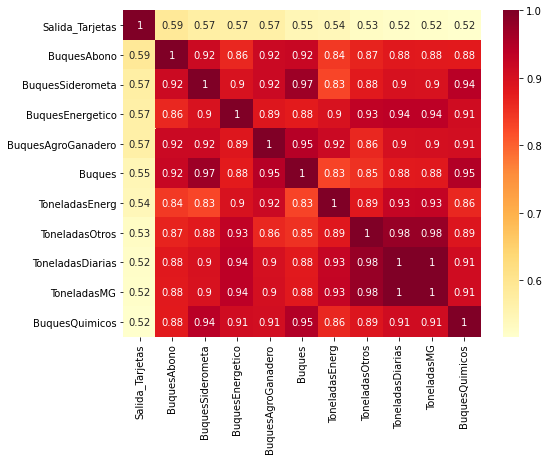

In [53]:
subset1=df_correlaciones.loc[:,["Salida_Tarjetas","BuquesAbono","BuquesSiderometa","BuquesEnergetico","BuquesAgroGanadero",   
"Buques","ToneladasEnerg","ToneladasOtros","ToneladasDiarias","ToneladasMG","BuquesQuimicos"]] 
corr = subset1.corr ()
corr.style.background_gradient (cmap='YlOrRd').set_precision(3)

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap = "YlOrRd")
plt.show()

#### Repito el estudio de correlaciones con coeficientes de correlación que no asume normalidad en la distribución de las variables: Spearman y Kendall

##### Matriz de correlación de Kendall 

In [54]:
corr = df_correlaciones.corr (method = 'kendall')
corr.style.background_gradient ()

,Salida_QR,Salida_Tarjetas,Salida_totales,Buques,BuquesAbono,BuquesAgroGanadero,BuquesEnergetico,BuquesConstruccion,BuquesNoMetal,BuquesOtraM,BuquesQuimicos,BuquesSiderometa,BuquesVehiculos,ToneladasDiarias,ToneladasGL,ToneladasGS,ToneladasMG,ToneladasAbono,ToneladasAgroGan,ToneladasEnerg,ToneladasConstr,ToneladasNoMet,ToneladasOtros,ToneladasQuimic,ToneladasSideromet,ToneladasVehicul
Salida_QR,1.000000,0.380522,0.760275,0.253654,0.273511,0.270875,0.274410,0.228754,0.198390,0.253360,0.254274,0.268580,0.224272,0.242094,0.335381,0.204540,0.241197,0.233466,0.237369,0.245956,0.224035,0.091690,0.237196,0.183817,0.199425,0.227326
Salida_Tarjetas,0.380522,1.000000,0.623719,0.411067,0.436945,0.423034,0.458642,0.388070,0.370734,0.375315,0.411933,0.416179,0.358491,0.406593,0.289112,0.342554,0.406130,0.380574,0.389830,0.421440,0.371298,0.312287,0.406968,0.298722,0.208657,0.379607
Salida_totales,0.760275,0.623719,1.000000,0.339997,0.359465,0.349368,0.368859,0.316665,0.287375,0.316027,0.327403,0.353883,0.295508,0.325520,0.328155,0.275931,0.324218,0.307781,0.314964,0.330991,0.299705,0.191112,0.321066,0.241935,0.215379,0.300866
Buques,0.253654,0.411067,0.339997,1.000000,0.720218,0.785240,0.509149,0.761898,0.539359,0.496522,0.669803,0.781669,0.561573,0.565539,0.520708,0.496227,0.566927,0.473452,0.583518,0.552482,0.559848,0.386672,0.497514,0.590872,0.236578,0.569539
BuquesAbono,0.273511,0.436945,0.359465,0.720218,1.000000,0.723760,0.550745,0.653539,0.556067,0.511097,0.676440,0.625684,0.621360,0.633689,0.524587,0.537315,0.631803,0.660878,0.606122,0.627348,0.571600,0.392509,0.594185,0.573326,0.301477,0.638816
BuquesAgroGanadero,0.270875,0.423034,0.349368,0.785240,0.723760,1.000000,0.606113,0.702599,0.543119,0.511987,0.701357,0.680937,0.593920,0.646999,0.450083,0.482849,0.648539,0.515529,0.708256,0.687226,0.580317,0.444627,0.574854,0.575548,0.189864,0.681278
BuquesEnergetico,0.274410,0.458642,0.368859,0.509149,0.550745,0.606113,1.000000,0.561377,0.375236,0.616495,0.690957,0.589344,0.635128,0.752660,0.263955,0.439598,0.753193,0.504675,0.715339,0.716842,0.648681,0.260959,0.739539,0.462872,0.371766,0.658804
BuquesConstruccion,0.228754,0.388070,0.316665,0.761898,0.653539,0.702599,0.561377,1.000000,0.596988,0.445172,0.658154,0.752244,0.548097,0.659819,0.471282,0.586092,0.657943,0.558178,0.615893,0.587817,0.762875,0.399221,0.601239,0.544794,0.352997,0.602442
BuquesNoMetal,0.198390,0.370734,0.287375,0.539359,0.556067,0.543119,0.375236,0.596988,1.000000,0.284396,0.488162,0.603057,0.431195,0.546046,0.481847,0.602337,0.539401,0.587936,0.413656,0.447162,0.557954,0.613347,0.524537,0.470684,0.362059,0.496760
BuquesOtraM,0.253360,0.375315,0.316027,0.496522,0.511097,0.511987,0.616495,0.445172,0.284396,1.000000,0.644172,0.493974,0.696051,0.579051,0.361295,0.263143,0.586305,0.359611,0.594845,0.581494,0.418694,0.192216,0.580679,0.516699,0.289012,0.573947


                    Salida_QR  Salida_Tarjetas  Salida_totales    Buques  \
Salida_Tarjetas      0.380522         1.000000        0.623719  0.411067   
Salida_totales       0.760275         0.623719        1.000000  0.339997   
BuquesEnergetico     0.274410         0.458642        0.368859  0.509149   
BuquesAbono          0.273511         0.436945        0.359465  0.720218   
BuquesAgroGanadero   0.270875         0.423034        0.349368  0.785240   
ToneladasEnerg       0.245956         0.421440        0.330991  0.552482   
BuquesSiderometa     0.268580         0.416179        0.353883  0.781669   
BuquesQuimicos       0.254274         0.411933        0.327403  0.669803   
Buques               0.253654         0.411067        0.339997  1.000000   
ToneladasOtros       0.237196         0.406968        0.321066  0.497514   
ToneladasDiarias     0.242094         0.406593        0.325520  0.565539   
ToneladasMG          0.241197         0.406130        0.324218  0.566927   
ToneladasAgr

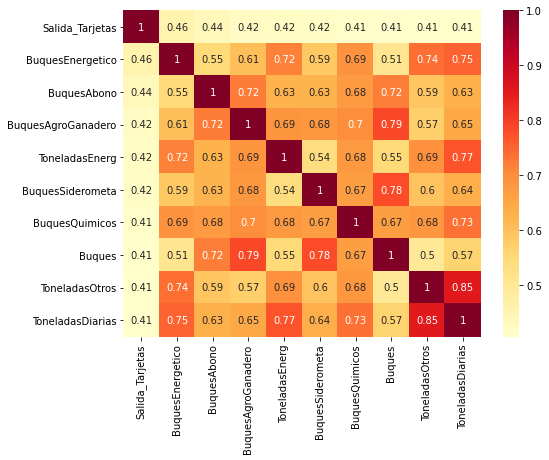

In [55]:
print(corr.sort_values(by='Salida_Tarjetas', ascending = False))
subset2=df_correlaciones.loc[:,["Salida_Tarjetas","BuquesEnergetico","BuquesAbono","BuquesAgroGanadero","ToneladasEnerg","BuquesSiderometa","BuquesQuimicos","Buques","ToneladasOtros","ToneladasDiarias"]]
corr = subset2.corr(method = 'kendall')
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap = "YlOrRd")
plt.show()

#### Matriz de correlación de Spearman 

In [56]:
corr = df_correlaciones.corr (method = 'spearman')
corr.style.background_gradient ()

,Salida_QR,Salida_Tarjetas,Salida_totales,Buques,BuquesAbono,BuquesAgroGanadero,BuquesEnergetico,BuquesConstruccion,BuquesNoMetal,BuquesOtraM,BuquesQuimicos,BuquesSiderometa,BuquesVehiculos,ToneladasDiarias,ToneladasGL,ToneladasGS,ToneladasMG,ToneladasAbono,ToneladasAgroGan,ToneladasEnerg,ToneladasConstr,ToneladasNoMet,ToneladasOtros,ToneladasQuimic,ToneladasSideromet,ToneladasVehicul
Salida_QR,1.000000,0.500081,0.905514,0.385090,0.385726,0.390534,0.385033,0.343412,0.272913,0.368703,0.362655,0.393674,0.323250,0.359993,0.456752,0.303133,0.358194,0.339194,0.350973,0.367457,0.337123,0.125743,0.350149,0.277752,0.297066,0.338063
Salida_Tarjetas,0.500081,1.000000,0.778956,0.591863,0.600158,0.591547,0.618483,0.552846,0.511112,0.522628,0.570181,0.591153,0.510082,0.584275,0.405864,0.498017,0.583480,0.543324,0.557321,0.601379,0.539899,0.440998,0.584801,0.446053,0.319131,0.548743
Salida_totales,0.905514,0.778956,1.000000,0.499768,0.505127,0.494586,0.510537,0.458149,0.395363,0.457087,0.465123,0.507857,0.428242,0.476763,0.464102,0.401230,0.475393,0.441869,0.458456,0.487579,0.442465,0.276331,0.472128,0.363312,0.324265,0.447252
Buques,0.385090,0.591863,0.499768,1.000000,0.850124,0.904906,0.657525,0.895405,0.688685,0.642062,0.802333,0.905130,0.715453,0.738408,0.683919,0.625283,0.739420,0.625677,0.760376,0.730630,0.727545,0.511154,0.673366,0.779711,0.322056,0.752267
BuquesAbono,0.385726,0.600158,0.505127,0.850124,1.000000,0.849125,0.688667,0.788372,0.683292,0.639490,0.791102,0.761062,0.751302,0.787142,0.654573,0.682885,0.784910,0.771589,0.769938,0.784507,0.729302,0.505924,0.752608,0.729251,0.409857,0.792186
BuquesAgroGanadero,0.390534,0.591547,0.494586,0.904906,0.849125,1.000000,0.739835,0.829845,0.686588,0.644787,0.821015,0.809592,0.740259,0.803770,0.588806,0.620988,0.805036,0.663130,0.860631,0.845964,0.740650,0.565331,0.734680,0.745818,0.271640,0.846863
BuquesEnergetico,0.385033,0.618483,0.510537,0.657525,0.688667,0.739835,1.000000,0.690913,0.520360,0.744314,0.811755,0.727411,0.782709,0.881380,0.359304,0.579848,0.881827,0.653927,0.858350,0.856489,0.786423,0.363820,0.874554,0.605534,0.503612,0.819327
BuquesConstruccion,0.343412,0.552846,0.458149,0.895405,0.788372,0.829845,0.690913,1.000000,0.732841,0.564942,0.785724,0.884824,0.690305,0.819761,0.605306,0.737189,0.817544,0.707951,0.771612,0.749323,0.902975,0.516742,0.769775,0.716930,0.478062,0.765893
BuquesNoMetal,0.272913,0.511112,0.395363,0.688685,0.683292,0.686588,0.520360,0.732841,1.000000,0.388539,0.620968,0.751339,0.556275,0.707679,0.592427,0.766718,0.700716,0.732244,0.563269,0.602042,0.726866,0.743053,0.680542,0.617414,0.495410,0.646325
BuquesOtraM,0.368703,0.522628,0.457087,0.642062,0.639490,0.644787,0.744314,0.564942,0.388539,1.000000,0.775594,0.625042,0.837841,0.738909,0.477886,0.359516,0.746295,0.480284,0.756061,0.739611,0.546746,0.265376,0.738861,0.672364,0.398188,0.742405


                    Salida_QR  Salida_Tarjetas  Salida_totales    Buques  \
Salida_Tarjetas      0.500081         1.000000        0.778956  0.591863   
Salida_totales       0.905514         0.778956        1.000000  0.499768   
BuquesEnergetico     0.385033         0.618483        0.510537  0.657525   
ToneladasEnerg       0.367457         0.601379        0.487579  0.730630   
BuquesAbono          0.385726         0.600158        0.505127  0.850124   
Buques               0.385090         0.591863        0.499768  1.000000   
BuquesAgroGanadero   0.390534         0.591547        0.494586  0.904906   
BuquesSiderometa     0.393674         0.591153        0.507857  0.905130   
ToneladasOtros       0.350149         0.584801        0.472128  0.673366   
ToneladasDiarias     0.359993         0.584275        0.476763  0.738408   
ToneladasMG          0.358194         0.583480        0.475393  0.739420   
BuquesQuimicos       0.362655         0.570181        0.465123  0.802333   
ToneladasAgr

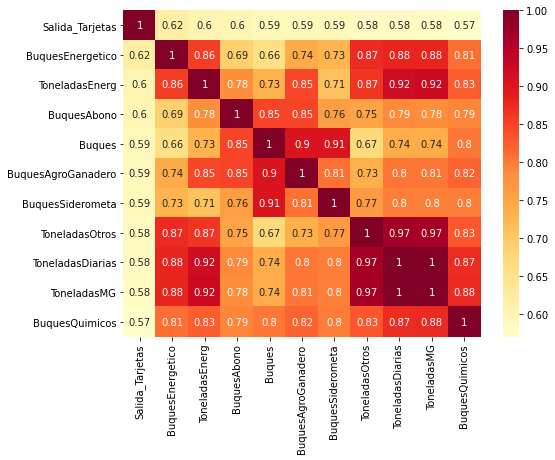

In [57]:
print(corr.sort_values(by='Salida_Tarjetas', ascending = False))
subset3=df_correlaciones.loc[:,["Salida_Tarjetas","BuquesEnergetico","ToneladasEnerg","BuquesAbono","Buques","BuquesAgroGanadero","BuquesSiderometa","ToneladasOtros","ToneladasDiarias","ToneladasMG","BuquesQuimicos"]]
corr = subset3.corr(method = 'spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap = "YlOrRd")
plt.show()

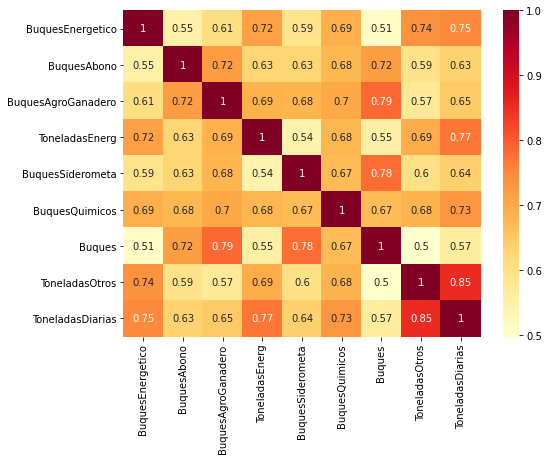

In [58]:
subset2=df_correlaciones.loc[:,["BuquesEnergetico","BuquesAbono","BuquesAgroGanadero","ToneladasEnerg","BuquesSiderometa","BuquesQuimicos","Buques","ToneladasOtros","ToneladasDiarias"]]
corr = subset2.corr(method = 'kendall')
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap = "YlOrRd")
plt.show()

In [ ]:
corr["Salida_Tarjetas"].sort_values(ascending = False)[2:12]["cantidadBuquesEnergetico"]

In [60]:
dic_variables_correlacionadas = {}
for elem in corr["Salida_Tarjetas"].sort_values(ascending = False)[2:12].index.tolist():
    dic_variables_correlacionadas[elem] = df_correlaciones[elem]
dic_variables_correlacionadas["Salida_Tarjetas"] = df_salidas["cantidadTarjeta"].tolist()
dic_variables_correlacionadas["Fecha"] = lista_dias_datetime

variables_correlacionadas = pd.DataFrame(dic_variables_correlacionadas, columns = dic_variables_correlacionadas.keys())
print(variables_correlacionadas.shape)
variables_correlacionadas.to_csv("variables_selec_manualmente_correlacion.csv",index = False)

KeyError: 'Salida_Tarjetas'

In [ ]:
type(corr["Salida_Tarjetas"].sort_values(ascending = False)[2:12].index.tolist())

#### Coeficiente de correlación Jacknife entra algunas de las variables con mejor correlación en el estudio anterior

In [64]:
# Función Jackknife correlation
# ==============================================================================
from scipy import stats

def correlacion_jackknife(x, y):
    '''
    Esta función aplica el método de Jackknife para el cálculo del coeficiente
    de correlación de Pearson.
    
    
    Parameters
    ----------
    x : 1D np.ndarray, pd.Series 
        Variable X.
        
    y : 1D np.ndarray, pd.Series
        Variable y.     

    Returns 
    -------
    correlaciones: 1D np.ndarray
        Valor de correlación para cada iteración de Jackknife
    '''
    
    n = len(x)
    valores_jackknife = np.full(shape=n, fill_value=np.nan, dtype=float)
    
    for i in range(n):
        # Loop para excluir cada observación y calcular la correlación
        r = stats.pearsonr(np.delete(x, i), np.delete(y, i))[0]
        valores_jackknife[i] = r

    promedio_jackknife = np.nanmean(valores_jackknife)
    standar_error = np.sqrt(((n - 1) / n) * \
                    np.nansum((valores_jackknife - promedio_jackknife) ** 2))
    bias = (n - 1) * (promedio_jackknife - stats.pearsonr(x, y)[0])
    
    resultados = {
        'valores_jackknife' : valores_jackknife,
        'promedio'          : promedio_jackknife,
        'se'                : standar_error,
        'bias'              : bias
    }
    
    return resultados

In [65]:
corr = subset3.corr(method = 'correlacion_jackknife')

ValueError: method must be either 'pearson', 'spearman', 'kendall', or a callable, 'correlacion_jackknife' was supplied

In [66]:
correlacion = correlacion_jackknife(x=df_salidas["cantidadTarjeta"].tolist(), y=lista_abonos)
print(f"Correlación jackknife tarjetas vs cantidad de buques de abono: {correlacion['promedio']}")
print(f"Error estándar: {correlacion['se']}")
print(f"Error bias: {correlacion['bias']}")
#print(f"Valores_jackknife: {correlacion['valores_jackknife']}")

Correlación jackknife tarjetas vs cantidad de buques de abono: 0.5888798725951129
Error estándar: 0.040876668671958494
Error bias: 0.00023667010098216146


In [67]:
correlacion = correlacion_jackknife(x=df_salidas["cantidadTarjeta"].tolist(), y=df_cantidad_buques["cantidad"].tolist())
print(f"Correlación jackknife trjetas vs cantidad de buques: {correlacion['promedio']}")
print(f"Error estándar: {correlacion['se']}")
print(f"Error bias: {correlacion['bias']}")

Correlación jackknife trjetas vs cantidad de buques: 0.5471376234047571
Error estándar: 0.04257342160184447
Error bias: 0.0005076332177211818


In [68]:
correlacion = correlacion_jackknife(x=df_salidas["cantidadTarjeta"].tolist(), y=lista_energetico)
print(f"Correlación jackknife trjetas vs cantidad de buques energéticos: {correlacion['promedio']}")
print(f"Error estándar: {correlacion['se']}")
print(f"Error bias: {correlacion['bias']}")

Correlación jackknife trjetas vs cantidad de buques energéticos: 0.5690941209036536
Error estándar: 0.042726996937541846
Error bias: 1.4481257071041753e-05


In [69]:
correlacion = correlacion_jackknife(x=df_salidas["cantidadTarjeta"].tolist(), y=cantidad_toneladas_GS)
print(f"Correlación jackknife trjetas vs cantidad de toneladas GS: {correlacion['promedio']}")
print(f"Error estándar: {correlacion['se']}")
print(f"Error bias: {correlacion['bias']}")

Correlación jackknife trjetas vs cantidad de toneladas GS: 0.40773991465125314
Error estándar: 0.050449083192382546
Error bias: 7.34084579521177e-05


In [432]:
for elem in variables.keys():
    correlacion_jacknife =  correlacion_jackknife(x=df_salidas["cantidadTarjeta"].tolist(), y=variables[elem])
    print(correlacion_jacknife['promedio'])

0.4433418874968005
1.0
0.7763013236196882
0.5471376234047571
0.5888798725951129
0.5681429820789173
0.5690941209036536
0.5058577090992261
0.40772346019806954
0.4703812702174562
0.5166089004038061
0.5726088886446407
0.42615724497525176
0.5233656820007846
-0.12369813532720735
0.40773991465125314
0.5218104285374817
0.3720434493184189
0.5069291971003358
0.544814806345137
0.4797816170140137
0.24171026775538462
0.5291790207640319
0.40107770592371106
0.2363466826179496
0.47611596206657175


#### ESTUDIO DE CORRELACIONES EN LOS DÍAS DE MÁXIMA SALIDA DE VEHÍCULOS CON TARJETA (MALOS RESULTADOS)

In [433]:
df_salidas_maximas_tarjeta = df_salidas.sort_values(by="cantidadTarjeta", ascending = False).head(30)
print(df_salidas_maximas_tarjeta)
indices_valores_maximos_tarjetas = df_salidas_maximas_tarjeta.index.tolist()
print(indices_valores_maximos_tarjetas)
df_dias_maximos = df_correlaciones.loc[indices_valores_maximos_tarjetas]
print(df_dias_maximos.shape)

     cantidadQR       Fecha  cantidadTarjeta  Suma accesos
132       553.0  2021-08-27            720.0        1273.0
27        504.0  2021-05-10            691.0        1195.0
23         97.0  2021-05-06            685.0         782.0
152       679.0  2021-09-17            656.0        1335.0
151       743.0  2021-09-16            652.0        1395.0
102       545.0  2021-07-27            623.0        1168.0
173       460.0  2021-10-08            619.0        1079.0
1        1289.0  2021-04-14            607.0        1896.0
104       626.0  2021-07-29            596.0        1222.0
130       547.0  2021-08-25            580.0        1127.0
20        940.0  2021-05-03            572.0        1512.0
51        945.0  2021-06-04            567.0        1512.0
101       350.0  2021-07-26            566.0         916.0
44        622.0  2021-05-28            560.0        1182.0
76        573.0  2021-06-30            559.0        1132.0
172        76.0  2021-10-07            549.0         625

In [434]:
corr = df_dias_maximos.corr (method = 'pearson')
corr.style.background_gradient ()

,Salida_QR,Salida_Tarjetas,Salida_totales,cantidadBuques,cantidadBuquesAbono,cantidadBuquesAgroGanadero,cantidadBuquesEnergetico,cantidadBuquesConstruccion,cantidadBuquesNoMetal,cantidadBuquesOtraM,cantidadBuquesQuimicos,cantidadBuquesSiderometa,cantidadBuquesVehiculos,cantidadToneladasDiarias,cantidadToneladasGL,cantidadToneladasGS,cantidadToneladasMG,cantidadToneladasAbono,cantidadToneladasAgroGan,cantidadToneladasEnerg,cantidadToneladasConstr,cantidadToneladasNoMet,cantidadToneladasOtros,cantidadToneladasQuimic,cantidadToneladasSideromet,cantidadToneladasVehicul
Salida_QR,1.000000,0.157265,0.979932,0.297179,0.370403,0.156000,0.247980,0.187214,0.191023,0.080730,0.359912,0.349481,0.094228,0.238845,0.311143,0.171609,0.234652,0.169779,0.159102,0.092637,0.191153,-0.078506,0.245729,0.078272,0.368622,0.147945
Salida_Tarjetas,0.157265,1.000000,0.350961,0.121873,-0.041238,0.016518,0.073824,0.008252,-0.141728,0.018922,0.041243,0.065302,-0.034659,-0.008322,0.015401,-0.027374,-0.007276,-0.070869,0.040772,0.007271,-0.014586,-0.077806,0.039617,-0.003685,-0.084419,-0.020649
Salida_totales,0.979932,0.350961,1.000000,0.306382,0.342889,0.151251,0.250032,0.179180,0.152519,0.080366,0.349589,0.344555,0.082350,0.224791,0.298131,0.157192,0.221026,0.146678,0.159088,0.089305,0.178305,-0.090143,0.240994,0.073473,0.332484,0.136112
cantidadBuques,0.297179,0.121873,0.306382,1.000000,0.867691,0.900630,0.661671,0.813296,0.318446,0.644323,0.860024,0.938203,0.639966,0.723248,0.453035,0.220031,0.723482,0.034889,0.711979,0.681077,0.567672,-0.069607,0.610180,0.682164,0.172736,0.687285
cantidadBuquesAbono,0.370403,-0.041238,0.342889,0.867691,1.000000,0.790151,0.588945,0.617156,0.383057,0.653472,0.791661,0.804588,0.695781,0.691646,0.479081,0.300348,0.688033,0.246795,0.592370,0.586592,0.487372,0.021060,0.663907,0.629303,0.210981,0.637087
cantidadBuquesAgroGanadero,0.156000,0.016518,0.151251,0.900630,0.790151,1.000000,0.765713,0.728330,0.363230,0.690099,0.897096,0.860816,0.726038,0.856628,0.325653,0.196085,0.859726,0.053164,0.862114,0.856990,0.609623,-0.015063,0.715125,0.762921,0.129821,0.851977
cantidadBuquesEnergetico,0.247980,0.073824,0.250032,0.661671,0.588945,0.765713,1.000000,0.537833,-0.057945,0.702193,0.810648,0.661773,0.711128,0.875981,-0.142061,0.193202,0.879634,0.152056,0.825318,0.829480,0.597627,-0.057866,0.832373,0.513281,0.358537,0.782386
cantidadBuquesConstruccion,0.187214,0.008252,0.179180,0.813296,0.617156,0.728330,0.537833,1.000000,0.420337,0.232669,0.624325,0.883674,0.366103,0.664019,0.346229,0.387647,0.656381,0.163594,0.571657,0.558391,0.845180,0.012317,0.534684,0.519804,0.305579,0.521776
cantidadBuquesNoMetal,0.191023,-0.141728,0.152519,0.318446,0.383057,0.363230,-0.057945,0.420337,1.000000,-0.044884,0.280001,0.462060,0.101451,0.350913,0.667552,0.419148,0.337591,0.371027,0.210207,0.142423,0.439202,0.265378,0.254736,0.328951,0.319493,0.277726
cantidadBuquesOtraM,0.080730,0.018922,0.080366,0.644323,0.653472,0.690099,0.702193,0.232669,-0.044884,1.000000,0.785597,0.480895,0.851294,0.654327,0.024220,-0.143966,0.669251,-0.124917,0.746146,0.689346,0.099548,-0.075670,0.628227,0.539963,0.065265,0.720752


#### ESTUDIO DE CORRELACIONES DIVIDIENDO EN VENTANAS TEMPORALES(2)

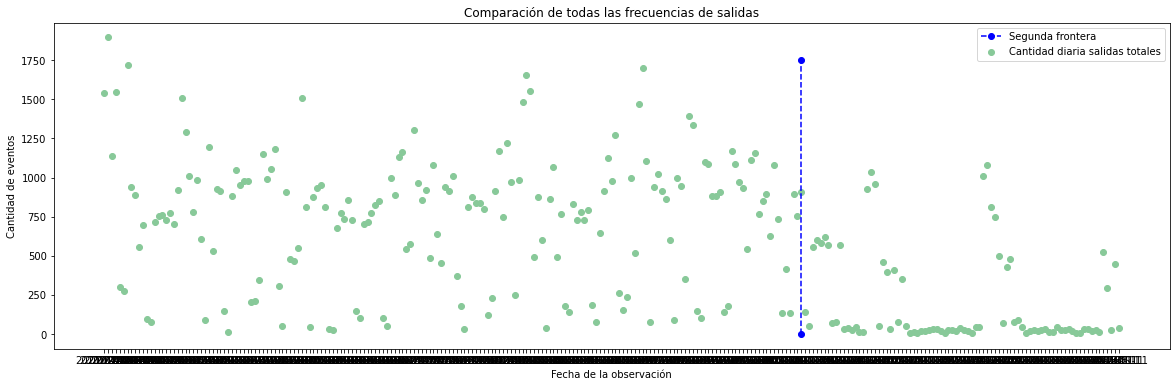

In [435]:
plt.figure(figsize=(20,6))
plt.scatter(merge_df["Fecha"],merge_df["Suma accesos"],color = '#88c999',label="Cantidad diaria salidas totales")
x_values2 = ["2021-10-15", "2021-10-15"]
y_values2 = [0, 1750]
plt.plot(x_values2, y_values2, 'bo', linestyle="--",label = "Segunda frontera")
#x_values1 = ["2021-05-10", "2021-05-10"]
#y_values1 = [0, 1750]
#plt.plot(x_values1, y_values1, 'bo', linestyle="--",label = "Primera frontera")
plt.xlabel("Fecha de la observación")
plt.ylabel("Cantidad de eventos")
plt.title("Comparación de todas las frecuencias de salidas")
plt.legend()

#### Dividimos los datos en primera etapa y segunda etapa temporal

In [436]:
df_etapa_1 = df_correlaciones[merge_df["Fecha"] <= "2021-10-15"]
df_etapa_2 = df_correlaciones[merge_df["Fecha"] >= "2021-10-15"]

In [437]:
corr = df_etapa_1.corr (method = 'spearman')
corr.style.background_gradient ()

,Salida_QR,Salida_Tarjetas,Salida_totales,cantidadBuques,cantidadBuquesAbono,cantidadBuquesAgroGanadero,cantidadBuquesEnergetico,cantidadBuquesConstruccion,cantidadBuquesNoMetal,cantidadBuquesOtraM,cantidadBuquesQuimicos,cantidadBuquesSiderometa,cantidadBuquesVehiculos,cantidadToneladasDiarias,cantidadToneladasGL,cantidadToneladasGS,cantidadToneladasMG,cantidadToneladasAbono,cantidadToneladasAgroGan,cantidadToneladasEnerg,cantidadToneladasConstr,cantidadToneladasNoMet,cantidadToneladasOtros,cantidadToneladasQuimic,cantidadToneladasSideromet,cantidadToneladasVehicul
Salida_QR,1.000000,0.408816,0.896958,0.000543,0.053225,0.032767,0.053641,-0.078808,0.026029,0.017909,-0.011883,0.048049,-0.004286,-0.002057,0.111227,0.039365,-0.003947,0.067235,-0.008317,0.034385,-0.055173,-0.081760,-0.007561,-0.064845,0.111286,-0.005820
Salida_Tarjetas,0.408816,1.000000,0.710640,-0.000321,-0.005670,0.005384,0.093410,-0.031635,-0.013928,0.043737,0.012050,0.001700,-0.010944,0.039041,-0.039011,0.005561,0.039783,0.001623,0.054177,0.104978,-0.027243,0.073956,0.040107,-0.032677,-0.034000,0.042278
Salida_totales,0.896958,0.710640,1.000000,0.013859,0.051215,0.016453,0.080829,-0.053075,0.003097,0.025902,-0.015407,0.057305,-0.005785,0.011038,0.066646,0.030444,0.010129,0.051357,0.012480,0.061357,-0.048203,-0.032621,0.009623,-0.068374,0.066057,0.003273
cantidadBuques,0.000543,-0.000321,0.013859,1.000000,0.578980,0.734713,0.041689,0.741743,0.444903,0.167985,0.493631,0.735077,0.384429,0.288701,0.468043,0.221281,0.295140,0.086107,0.408957,0.294264,0.288555,0.292541,0.118417,0.626673,-0.082823,0.409284
cantidadBuquesAbono,0.053225,-0.005670,0.051215,0.578980,1.000000,0.584749,0.113525,0.464056,0.417786,0.183928,0.484857,0.320596,0.482915,0.430131,0.439785,0.359184,0.427264,0.439459,0.451973,0.464119,0.305463,0.259468,0.334691,0.550589,0.055837,0.532971
cantidadBuquesAgroGanadero,0.032767,0.005384,0.016453,0.734713,0.584749,1.000000,0.267760,0.563742,0.438917,0.187283,0.540050,0.467824,0.438928,0.463422,0.254799,0.224771,0.469724,0.195689,0.660906,0.591683,0.325227,0.428792,0.279070,0.535684,-0.206641,0.645706
cantidadBuquesEnergetico,0.053641,0.093410,0.080829,0.041689,0.113525,0.267760,1.000000,0.184580,-0.013826,0.438185,0.512229,0.239067,0.523513,0.674610,-0.263334,0.152426,0.676354,0.171505,0.648660,0.631029,0.460492,-0.073553,0.657988,0.226960,0.316667,0.560273
cantidadBuquesConstruccion,-0.078808,-0.031635,-0.053075,0.741743,0.464056,0.563742,0.184580,1.000000,0.550178,0.004646,0.484626,0.707134,0.339457,0.536081,0.315262,0.558395,0.532254,0.366377,0.454679,0.381298,0.748917,0.311217,0.412864,0.486546,0.243300,0.458816
cantidadBuquesNoMetal,0.026029,-0.013928,0.003097,0.444903,0.417786,0.438917,-0.013826,0.550178,1.000000,-0.105532,0.320461,0.586667,0.266129,0.477380,0.583570,0.636212,0.464788,0.639050,0.188640,0.254186,0.524435,0.587139,0.404043,0.379425,0.382292,0.423126
cantidadBuquesOtraM,0.017909,0.043737,0.025902,0.167985,0.183928,0.187283,0.438185,0.004646,-0.105532,1.000000,0.510989,0.125191,0.766132,0.429022,0.022333,-0.222302,0.446829,-0.084988,0.475903,0.449553,0.004448,-0.137357,0.432478,0.435604,0.168615,0.486239


In [438]:
corr = df_etapa_2.corr (method = 'spearman')
corr.style.background_gradient ()

,Salida_QR,Salida_Tarjetas,Salida_totales,cantidadBuques,cantidadBuquesAbono,cantidadBuquesAgroGanadero,cantidadBuquesEnergetico,cantidadBuquesConstruccion,cantidadBuquesNoMetal,cantidadBuquesOtraM,cantidadBuquesQuimicos,cantidadBuquesSiderometa,cantidadBuquesVehiculos,cantidadToneladasDiarias,cantidadToneladasGL,cantidadToneladasGS,cantidadToneladasMG,cantidadToneladasAbono,cantidadToneladasAgroGan,cantidadToneladasEnerg,cantidadToneladasConstr,cantidadToneladasNoMet,cantidadToneladasOtros,cantidadToneladasQuimic,cantidadToneladasSideromet,cantidadToneladasVehicul
Salida_QR,1.000000,0.276012,0.994744,0.438542,0.186288,0.445222,0.354444,0.471617,-0.008079,0.430680,0.465871,0.359917,0.186290,0.372113,0.498252,0.200726,0.372198,0.142033,0.449016,0.387419,0.387216,-0.029970,0.330749,0.238777,0.167407,0.320984
Salida_Tarjetas,0.276012,1.000000,0.337640,0.341978,0.280031,0.345561,0.353602,0.287878,-0.050565,0.349231,0.391471,0.361804,0.180291,0.281065,0.261184,0.083690,0.286110,0.271406,0.294718,0.311788,0.231962,-0.060410,0.296580,0.096461,0.104219,0.239470
Salida_totales,0.994744,0.337640,1.000000,0.464072,0.212434,0.470315,0.379988,0.489694,-0.012647,0.454678,0.492367,0.384674,0.204320,0.400306,0.513589,0.218713,0.400720,0.168639,0.470055,0.410703,0.408086,-0.037991,0.355124,0.242615,0.191780,0.348756
cantidadBuques,0.438542,0.341978,0.464072,1.000000,0.796849,0.947816,0.908227,0.924613,0.017509,0.960552,0.955939,0.953014,0.535582,0.861666,0.800347,0.466907,0.860096,0.775548,0.886206,0.812444,0.856640,-0.019073,0.825284,0.471117,0.221255,0.746421
cantidadBuquesAbono,0.186288,0.280031,0.212434,0.796849,1.000000,0.712169,0.730089,0.655883,-0.059474,0.781292,0.746544,0.755970,0.501431,0.663070,0.618637,0.380011,0.659366,0.948161,0.617659,0.563016,0.640837,-0.043964,0.641184,0.209422,0.280678,0.595920
cantidadBuquesAgroGanadero,0.445222,0.345561,0.470315,0.947816,0.712169,1.000000,0.941000,0.933154,-0.012367,0.937910,0.941788,0.893359,0.581599,0.903826,0.798764,0.343777,0.903927,0.690992,0.924805,0.851417,0.905801,-0.031185,0.887566,0.430918,0.203279,0.793829
cantidadBuquesEnergetico,0.354444,0.353602,0.379988,0.908227,0.730089,0.941000,1.000000,0.898780,-0.004764,0.939640,0.922874,0.901807,0.583113,0.901471,0.783786,0.243458,0.902195,0.690644,0.923025,0.892937,0.882932,-0.012313,0.893505,0.457896,0.155404,0.790344
cantidadBuquesConstruccion,0.471617,0.287878,0.489694,0.924613,0.655883,0.933154,0.898780,1.000000,0.025607,0.930672,0.906165,0.893214,0.629568,0.895567,0.784258,0.309879,0.895439,0.623207,0.878869,0.808738,0.911265,0.004848,0.832597,0.422636,0.296273,0.810258
cantidadBuquesNoMetal,-0.008079,-0.050565,-0.012647,0.017509,-0.059474,-0.012367,-0.004764,0.025607,1.000000,0.026381,0.029930,0.032608,-0.118726,0.018712,-0.030497,0.273221,0.012090,-0.079077,0.033932,0.012227,-0.003903,0.940685,0.054119,0.391411,0.005453,-0.028259
cantidadBuquesOtraM,0.430680,0.349231,0.454678,0.960552,0.781292,0.937910,0.939640,0.930672,0.026381,1.000000,0.946522,0.941861,0.578347,0.888023,0.795906,0.384387,0.887273,0.737233,0.906499,0.860537,0.879134,0.013137,0.877827,0.503825,0.171404,0.774778


In [439]:
corr = df_etapa_1.corr (method = 'pearson')
corr.style.background_gradient ()

,Salida_QR,Salida_Tarjetas,Salida_totales,cantidadBuques,cantidadBuquesAbono,cantidadBuquesAgroGanadero,cantidadBuquesEnergetico,cantidadBuquesConstruccion,cantidadBuquesNoMetal,cantidadBuquesOtraM,cantidadBuquesQuimicos,cantidadBuquesSiderometa,cantidadBuquesVehiculos,cantidadToneladasDiarias,cantidadToneladasGL,cantidadToneladasGS,cantidadToneladasMG,cantidadToneladasAbono,cantidadToneladasAgroGan,cantidadToneladasEnerg,cantidadToneladasConstr,cantidadToneladasNoMet,cantidadToneladasOtros,cantidadToneladasQuimic,cantidadToneladasSideromet,cantidadToneladasVehicul
Salida_QR,1.000000,0.377349,0.911277,0.164602,0.152274,0.049713,0.103605,0.062549,0.026848,0.118130,0.110508,0.184338,0.057110,0.050900,0.131975,0.036666,0.050397,0.026274,0.034865,0.000787,0.001648,0.004061,0.056175,-0.040783,0.162693,0.015589
Salida_Tarjetas,0.377349,1.000000,0.725221,0.039412,0.036114,0.047110,0.072689,0.008573,-0.021254,0.057330,0.008679,0.040501,0.004851,0.031360,-0.034534,0.045563,0.030221,0.012806,0.047091,0.087112,-0.030931,0.107109,0.028676,-0.025279,-0.019765,0.040474
Salida_totales,0.911277,0.725221,1.000000,0.139904,0.129271,0.057909,0.109351,0.050316,0.010510,0.113321,0.086020,0.155061,0.044617,0.051788,0.082765,0.047521,0.050908,0.025228,0.046862,0.039321,-0.012529,0.050647,0.054517,-0.041562,0.112171,0.029588
cantidadBuques,0.164602,0.039412,0.139904,1.000000,0.847607,0.843750,0.600350,0.847558,0.358732,0.645209,0.857560,0.923616,0.640551,0.682752,0.425170,0.280180,0.684701,0.124459,0.668936,0.577454,0.577991,0.001354,0.581430,0.680475,0.254340,0.664317
cantidadBuquesAbono,0.152274,0.036114,0.129271,0.847607,1.000000,0.776370,0.585115,0.745165,0.432335,0.575083,0.804082,0.782532,0.705985,0.746501,0.481195,0.439090,0.743534,0.372054,0.674989,0.635878,0.588005,0.063278,0.681549,0.649895,0.248065,0.728573
cantidadBuquesAgroGanadero,0.049713,0.047110,0.057909,0.843750,0.776370,1.000000,0.622368,0.748475,0.402623,0.552956,0.771550,0.736890,0.615428,0.729226,0.231382,0.294368,0.731583,0.175130,0.817113,0.805149,0.583723,0.112368,0.592610,0.686588,-0.040162,0.786690
cantidadBuquesEnergetico,0.103605,0.072689,0.109351,0.600350,0.585115,0.622368,1.000000,0.556733,0.078563,0.673350,0.776261,0.665715,0.678586,0.836253,-0.061811,0.306406,0.840286,0.295377,0.801724,0.732024,0.642288,0.085503,0.821270,0.419143,0.411691,0.743848
cantidadBuquesConstruccion,0.062549,0.008573,0.050316,0.847558,0.745165,0.748475,0.556733,1.000000,0.507708,0.361743,0.741359,0.857719,0.540318,0.741893,0.400504,0.484689,0.737126,0.317710,0.639780,0.570615,0.848747,0.093847,0.655359,0.609217,0.340604,0.647478
cantidadBuquesNoMetal,0.026848,-0.021254,0.010510,0.358732,0.432335,0.402623,0.078563,0.507708,1.000000,-0.027729,0.300717,0.447143,0.314736,0.456389,0.635095,0.526558,0.444533,0.476046,0.249157,0.263307,0.492381,0.276000,0.391025,0.385245,0.263103,0.435644
cantidadBuquesOtraM,0.118130,0.057330,0.113321,0.645209,0.575083,0.552956,0.673350,0.361743,-0.027729,1.000000,0.768315,0.570492,0.812553,0.631195,0.103961,-0.014954,0.643621,0.011571,0.662953,0.577086,0.233867,-0.082770,0.604449,0.532748,0.250011,0.652700


In [440]:
corr = df_etapa_2.corr (method = 'pearson')
corr.style.background_gradient ()

,Salida_QR,Salida_Tarjetas,Salida_totales,cantidadBuques,cantidadBuquesAbono,cantidadBuquesAgroGanadero,cantidadBuquesEnergetico,cantidadBuquesConstruccion,cantidadBuquesNoMetal,cantidadBuquesOtraM,cantidadBuquesQuimicos,cantidadBuquesSiderometa,cantidadBuquesVehiculos,cantidadToneladasDiarias,cantidadToneladasGL,cantidadToneladasGS,cantidadToneladasMG,cantidadToneladasAbono,cantidadToneladasAgroGan,cantidadToneladasEnerg,cantidadToneladasConstr,cantidadToneladasNoMet,cantidadToneladasOtros,cantidadToneladasQuimic,cantidadToneladasSideromet,cantidadToneladasVehicul
Salida_QR,1.000000,0.191554,0.992152,0.412518,0.168601,0.405659,0.273150,0.449011,-0.059563,0.382989,0.377749,0.330115,0.289806,0.362409,0.344462,-0.112600,0.360228,-0.118219,0.368404,0.302278,0.370673,-0.174033,0.281231,0.263767,0.165409,0.346034
Salida_Tarjetas,0.191554,1.000000,0.312770,0.252921,0.189100,0.253584,0.217887,0.198188,-0.029534,0.245938,0.334462,0.262998,0.046160,0.190347,0.028989,0.023859,0.189927,-0.028265,0.218608,0.299392,0.169358,-0.054420,0.193153,0.126644,0.027014,0.135344
Salida_totales,0.992152,0.312770,1.000000,0.431435,0.187254,0.424881,0.292098,0.459779,-0.061404,0.401968,0.408174,0.352973,0.286340,0.374970,0.337046,-0.105929,0.372806,-0.118007,0.384373,0.330670,0.380293,-0.175353,0.296768,0.271394,0.163516,0.352116
cantidadBuques,0.412518,0.252921,0.431435,1.000000,0.730117,0.953498,0.898369,0.933138,-0.047963,0.978298,0.927624,0.936728,0.615139,0.854252,0.359574,-0.064508,0.852162,0.088628,0.871201,0.811155,0.819228,-0.165903,0.812316,0.408301,0.234124,0.763125
cantidadBuquesAbono,0.168601,0.189100,0.187254,0.730117,1.000000,0.651776,0.636960,0.603693,-0.080921,0.712348,0.594211,0.621322,0.516523,0.605309,0.234090,0.005736,0.603168,0.200558,0.532162,0.481635,0.529933,-0.104900,0.578050,0.090180,0.367147,0.568533
cantidadBuquesAgroGanadero,0.405659,0.253584,0.424881,0.953498,0.651776,1.000000,0.927806,0.938407,-0.069258,0.947361,0.883610,0.854827,0.687394,0.908776,0.309375,-0.116610,0.908564,0.086750,0.901308,0.837375,0.868270,-0.138218,0.883456,0.321790,0.237286,0.830884
cantidadBuquesEnergetico,0.273150,0.217887,0.292098,0.898369,0.636960,0.927806,1.000000,0.897099,-0.024021,0.934911,0.864330,0.847566,0.653928,0.912627,0.264052,-0.195203,0.914585,0.012845,0.930134,0.907962,0.869055,-0.111578,0.899490,0.394564,0.156201,0.819197
cantidadBuquesConstruccion,0.449011,0.198188,0.459779,0.933138,0.603693,0.938407,0.897099,1.000000,-0.035085,0.927903,0.850666,0.853969,0.735715,0.908080,0.350064,-0.164858,0.908163,0.050004,0.866469,0.788008,0.903201,-0.099168,0.836242,0.324404,0.318903,0.853330
cantidadBuquesNoMetal,-0.059563,-0.029534,-0.061404,-0.047963,-0.080921,-0.069258,-0.024021,-0.035085,1.000000,-0.046667,0.065777,0.041544,-0.170812,0.001216,-0.033730,0.346875,-0.004779,-0.092734,0.037349,0.018021,0.021988,0.464303,0.021523,0.364383,0.004317,-0.077580
cantidadBuquesOtraM,0.382989,0.245938,0.401968,0.978298,0.712348,0.947361,0.934911,0.927903,-0.046667,1.000000,0.916864,0.924906,0.647654,0.885545,0.357726,-0.105793,0.884338,0.049339,0.903102,0.859019,0.846994,-0.151029,0.866371,0.440499,0.170043,0.790574


In [441]:
corr = df_etapa_1.corr (method = 'kendall')
corr.style.background_gradient ()

,Salida_QR,Salida_Tarjetas,Salida_totales,cantidadBuques,cantidadBuquesAbono,cantidadBuquesAgroGanadero,cantidadBuquesEnergetico,cantidadBuquesConstruccion,cantidadBuquesNoMetal,cantidadBuquesOtraM,cantidadBuquesQuimicos,cantidadBuquesSiderometa,cantidadBuquesVehiculos,cantidadToneladasDiarias,cantidadToneladasGL,cantidadToneladasGS,cantidadToneladasMG,cantidadToneladasAbono,cantidadToneladasAgroGan,cantidadToneladasEnerg,cantidadToneladasConstr,cantidadToneladasNoMet,cantidadToneladasOtros,cantidadToneladasQuimic,cantidadToneladasSideromet,cantidadToneladasVehicul
Salida_QR,1.000000,0.303495,0.739033,-0.001069,0.038365,0.024390,0.038861,-0.057734,0.020238,0.005560,-0.009879,0.031239,-0.005058,-0.004190,0.084296,0.026175,-0.004656,0.044550,-0.007047,0.023220,-0.036442,-0.053304,-0.003958,-0.048229,0.072880,-0.005937
Salida_Tarjetas,0.303495,1.000000,0.565710,-0.001425,-0.004708,0.005061,0.067747,-0.023706,-0.009554,0.029191,0.009555,-0.001768,-0.008322,0.027106,-0.028290,0.005535,0.027804,-0.000179,0.037893,0.071489,-0.012742,0.052085,0.026120,-0.024510,-0.025657,0.029961
Salida_totales,0.739033,0.565710,1.000000,0.011157,0.033352,0.015238,0.058303,-0.035148,0.004281,0.017154,-0.010570,0.040964,-0.005115,0.007733,0.051125,0.020501,0.006687,0.035249,0.010706,0.038762,-0.030709,-0.021838,0.006164,-0.046207,0.044782,0.000582
cantidadBuques,-0.001069,-0.001425,0.011157,1.000000,0.463917,0.589418,0.028238,0.587051,0.344844,0.114910,0.384077,0.582554,0.299254,0.206917,0.346531,0.191989,0.212137,0.057844,0.289925,0.211646,0.223526,0.223221,0.082881,0.451825,-0.042484,0.291731
cantidadBuquesAbono,0.038365,-0.004708,0.033352,0.463917,1.000000,0.478216,0.089400,0.379035,0.352393,0.143235,0.414025,0.260897,0.397770,0.342744,0.353821,0.258834,0.341926,0.359028,0.345975,0.364430,0.243741,0.206875,0.263609,0.436383,0.053123,0.428168
cantidadBuquesAgroGanadero,0.024390,0.005061,0.015238,0.589418,0.478216,1.000000,0.200796,0.448692,0.344933,0.141145,0.440871,0.384809,0.347428,0.345531,0.195410,0.175060,0.350218,0.144406,0.516268,0.458643,0.239153,0.331952,0.206486,0.419518,-0.144890,0.495829
cantidadBuquesEnergetico,0.038861,0.067747,0.058303,0.028238,0.089400,0.200796,1.000000,0.151083,-0.021691,0.346902,0.420068,0.183978,0.419064,0.546515,-0.198185,0.106110,0.548565,0.124573,0.508619,0.493473,0.373237,-0.054925,0.524593,0.182753,0.237407,0.428666
cantidadBuquesConstruccion,-0.057734,-0.023706,-0.035148,0.587051,0.379035,0.448692,0.151083,1.000000,0.460178,0.031426,0.390747,0.565879,0.270642,0.396777,0.245247,0.435205,0.393961,0.287301,0.352756,0.288341,0.600709,0.242547,0.300578,0.370585,0.185817,0.346082
cantidadBuquesNoMetal,0.020238,-0.009554,0.004281,0.344844,0.352393,0.344933,-0.021691,0.460178,1.000000,-0.073410,0.257983,0.466467,0.209256,0.366595,0.446264,0.491320,0.356192,0.512982,0.144615,0.191007,0.396656,0.466988,0.319416,0.283876,0.281324,0.325427
cantidadBuquesOtraM,0.005560,0.029191,0.017154,0.114910,0.143235,0.141145,0.346902,0.031426,-0.073410,1.000000,0.396640,0.107866,0.636062,0.314709,0.030911,-0.148110,0.328623,-0.050726,0.350094,0.334077,0.029727,-0.089304,0.323097,0.327678,0.128790,0.349483


In [442]:
corr = df_etapa_2.corr (method = 'kendall')
corr.style.background_gradient ()

,Salida_QR,Salida_Tarjetas,Salida_totales,cantidadBuques,cantidadBuquesAbono,cantidadBuquesAgroGanadero,cantidadBuquesEnergetico,cantidadBuquesConstruccion,cantidadBuquesNoMetal,cantidadBuquesOtraM,cantidadBuquesQuimicos,cantidadBuquesSiderometa,cantidadBuquesVehiculos,cantidadToneladasDiarias,cantidadToneladasGL,cantidadToneladasGS,cantidadToneladasMG,cantidadToneladasAbono,cantidadToneladasAgroGan,cantidadToneladasEnerg,cantidadToneladasConstr,cantidadToneladasNoMet,cantidadToneladasOtros,cantidadToneladasQuimic,cantidadToneladasSideromet,cantidadToneladasVehicul
Salida_QR,1.000000,0.212240,0.962578,0.298421,0.145487,0.322525,0.259082,0.337120,-0.007296,0.298728,0.329891,0.258348,0.153002,0.268564,0.388307,0.154594,0.267605,0.119508,0.309342,0.248022,0.281889,-0.020153,0.224119,0.159853,0.110703,0.234233
Salida_Tarjetas,0.212240,1.000000,0.259975,0.260803,0.229187,0.274586,0.283490,0.222972,-0.043836,0.275075,0.304925,0.279000,0.131886,0.210651,0.222701,0.071146,0.213643,0.216230,0.221590,0.239058,0.177198,-0.049176,0.221405,0.082208,0.081304,0.176740
Salida_totales,0.962578,0.259975,1.000000,0.323691,0.165175,0.346331,0.279148,0.354248,-0.010027,0.320003,0.353377,0.278187,0.161775,0.288152,0.397548,0.174292,0.287197,0.135863,0.328929,0.269116,0.298478,-0.026857,0.244401,0.165802,0.124687,0.249834
cantidadBuques,0.298421,0.260803,0.323691,1.000000,0.651366,0.832883,0.765612,0.793107,0.015196,0.862442,0.857128,0.840451,0.400950,0.684294,0.651225,0.424679,0.684070,0.606975,0.714055,0.622439,0.681936,-0.018232,0.634749,0.405781,0.182726,0.567376
cantidadBuquesAbono,0.145487,0.229187,0.165175,0.651366,1.000000,0.572971,0.588466,0.512939,-0.052176,0.642217,0.601915,0.601945,0.369849,0.498247,0.522123,0.322622,0.493871,0.876943,0.477546,0.432018,0.472339,-0.034515,0.483837,0.193220,0.206953,0.437532
cantidadBuquesAgroGanadero,0.322525,0.274586,0.346331,0.832883,0.572971,1.000000,0.841421,0.817489,-0.006607,0.818762,0.841708,0.737284,0.441347,0.750813,0.652127,0.324522,0.752669,0.541780,0.789333,0.690934,0.749139,-0.026507,0.728434,0.364193,0.167886,0.624432
cantidadBuquesEnergetico,0.259082,0.283490,0.279148,0.765612,0.588466,0.841421,1.000000,0.786635,-0.000490,0.839667,0.810697,0.773990,0.461648,0.775928,0.650598,0.222338,0.777855,0.533959,0.808003,0.777465,0.742169,-0.009023,0.761680,0.381360,0.138366,0.649747
cantidadBuquesConstruccion,0.337120,0.222972,0.354248,0.793107,0.512939,0.817489,0.786635,1.000000,0.023970,0.818603,0.770456,0.752006,0.512544,0.743590,0.652408,0.274105,0.746127,0.466796,0.725354,0.634949,0.767109,0.011684,0.663032,0.333334,0.230282,0.650837
cantidadBuquesNoMetal,-0.007296,-0.043836,-0.010027,0.015196,-0.052176,-0.006607,-0.000490,0.023970,1.000000,0.023475,0.027880,0.031340,-0.097150,0.017712,-0.027870,0.215848,0.011356,-0.066432,0.027731,0.012355,0.005001,0.834086,0.044061,0.316274,0.010446,-0.020447
cantidadBuquesOtraM,0.298728,0.275075,0.320003,0.862442,0.642217,0.818762,0.839667,0.818603,0.023475,1.000000,0.844876,0.826039,0.459484,0.737974,0.656782,0.341833,0.738441,0.574956,0.759740,0.702278,0.716996,0.014698,0.718809,0.425108,0.132236,0.609831
